In [8]:
import sys
sys.path.append("/Users/maithoma/work/github/bayesLearn/scripts/")
from Entro import *
%matplotlib inline

try:
    reload(bayesLib)
except:
    import bayesLib

from bayesLib import *

### [in fact, at each submission, we observe the outcome of a (multiplicative?) process which leads to a power law distribution of coarse-grained increments between k and k+1]


In [9]:
simplName = "simpleConvergenceMeans"
complName = "complexConvergenceMeans"

In [10]:
simpl = open(dir + "Data/simpleConvergenceMeans.csv",'rb').read().split(",")
compl = open(dir + "Data/complexConvergenceMeans.csv",'rb').read().split(",")
learn13 = open(dir + "Data/person13Learning.csv",'rb').read().split("\n")
explor = open(dir + "Data/exploration.csv",'rb').read().split("\n")


for l,line in enumerate(learn13):
    #print line.split(",")
    try:
        learn13[l] = map(float,line.split(","))
    except:
        print line
        
learn13 = np.array(learn13)

dfSimpleLearning = pd.DataFrame.from_csv(dir + "Data/simple_distances.csv")#simple 
dfComplexLearning = pd.DataFrame.from_csv(dir + "Data/complex_distances_2.csv")# complex

dfExplor = pandas.DataFrame.from_csv(dir + "Data/exploration.csv")
dfExplor = dfExplor[:-1]

#df = dfAllLearning
#df.index = map(int,df.index)

NameError: name 'pandas' is not defined

In [11]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",remove_duplicates=False)

In [12]:
treatment = "simple"
treatment_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

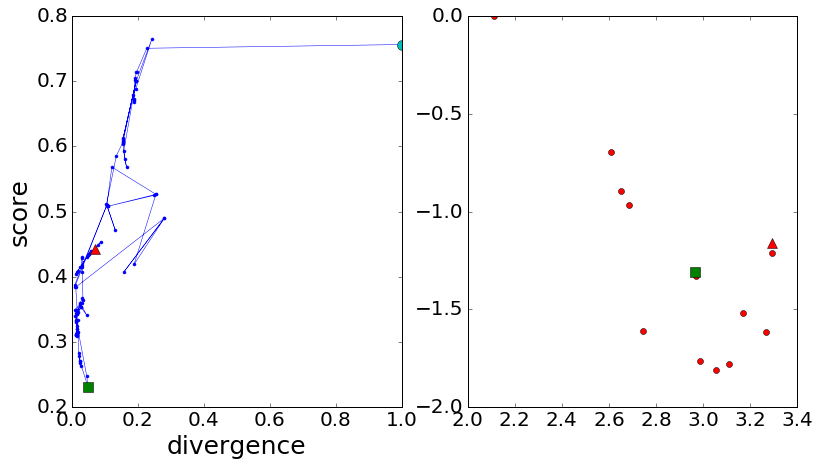

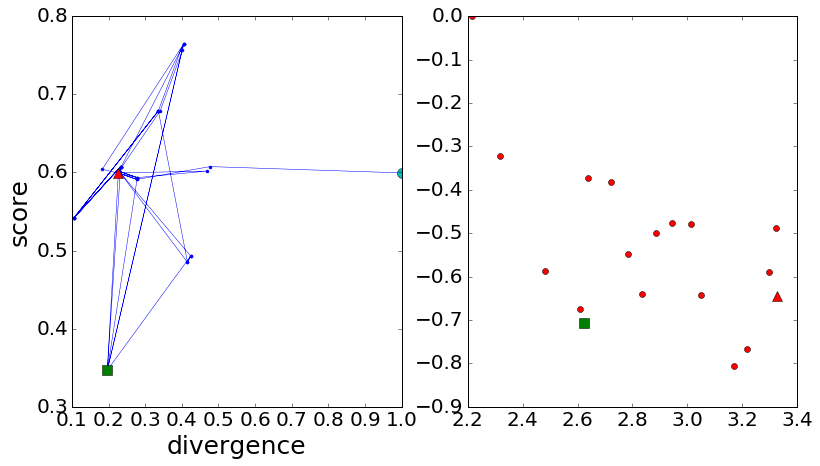

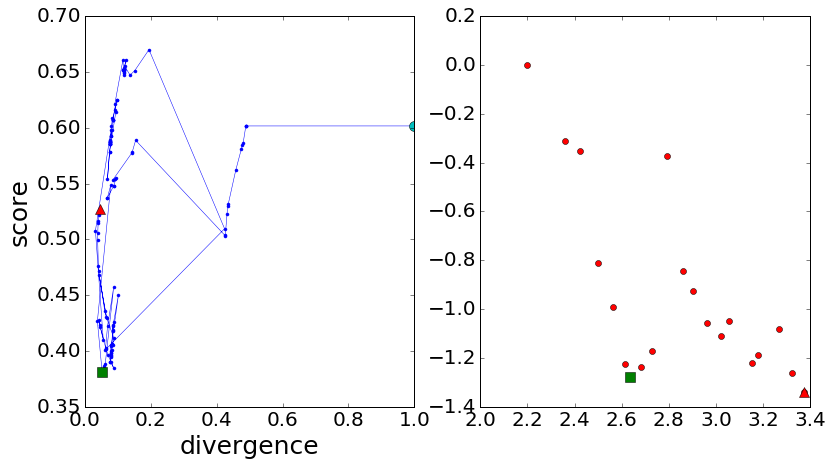

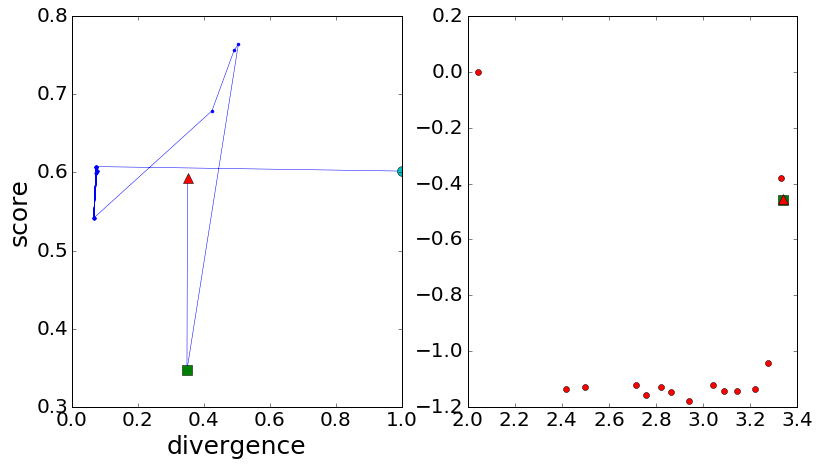

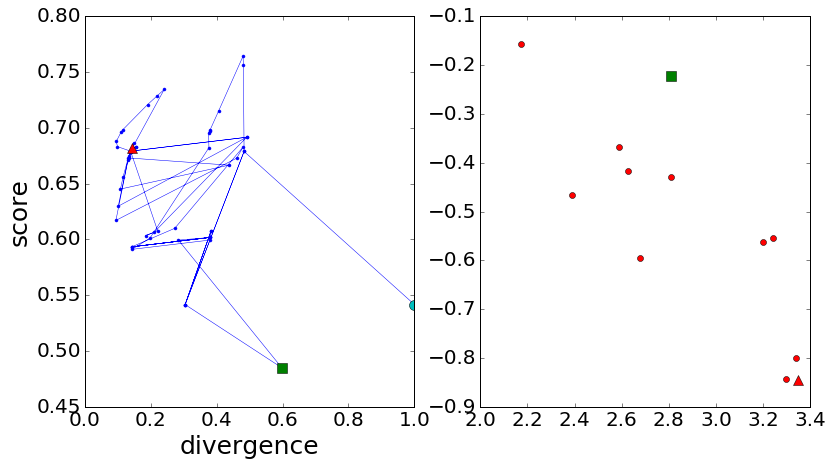

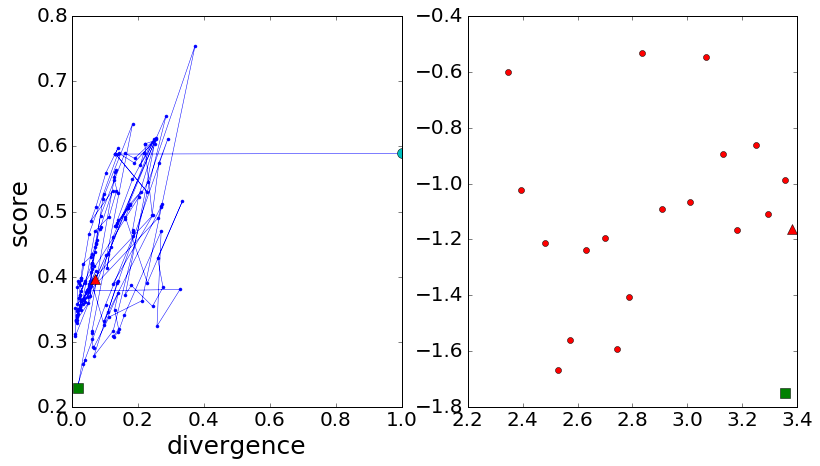

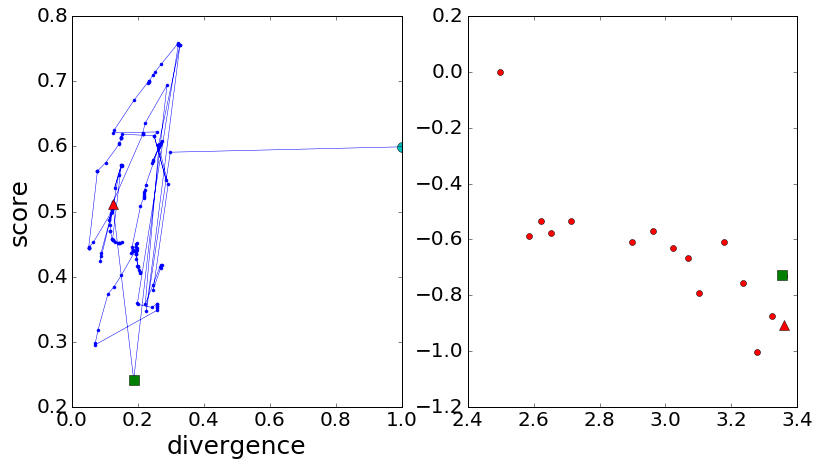

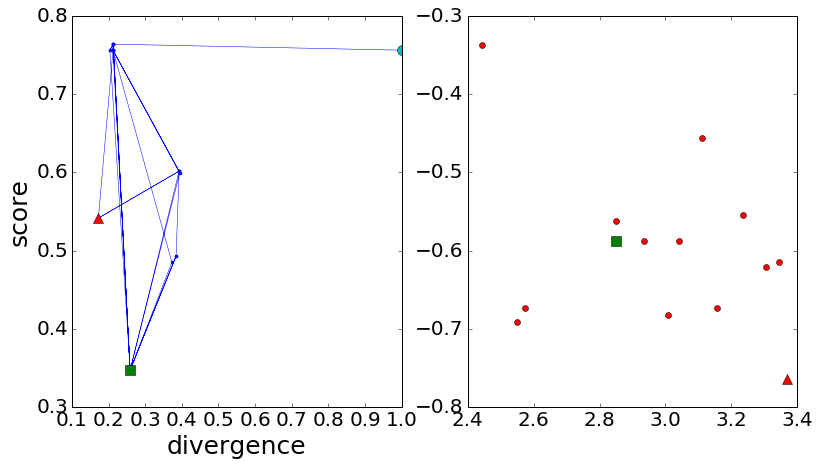

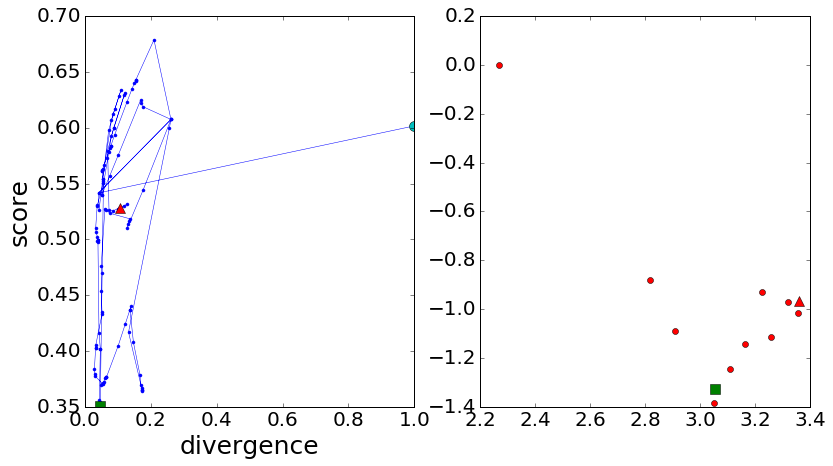

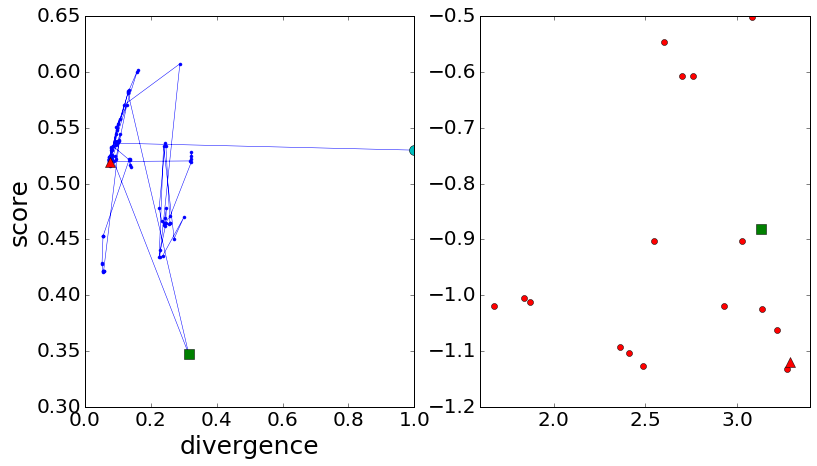

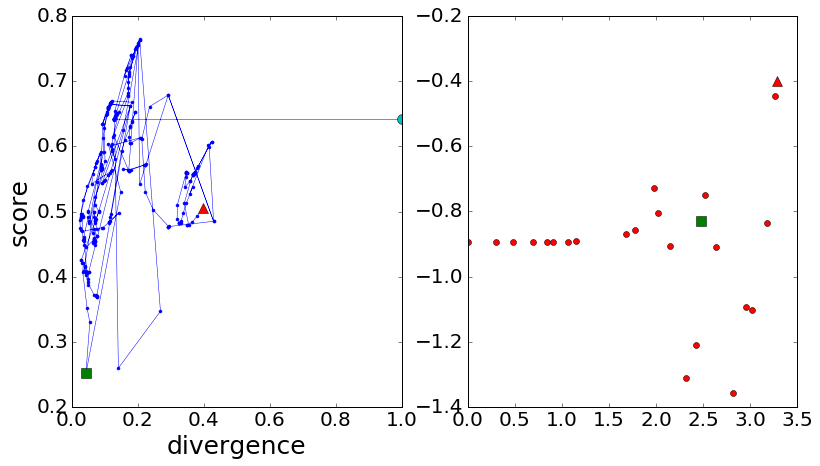

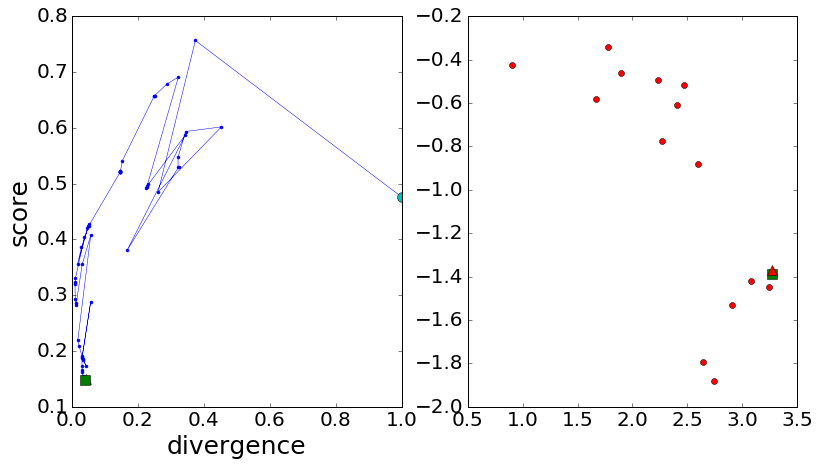

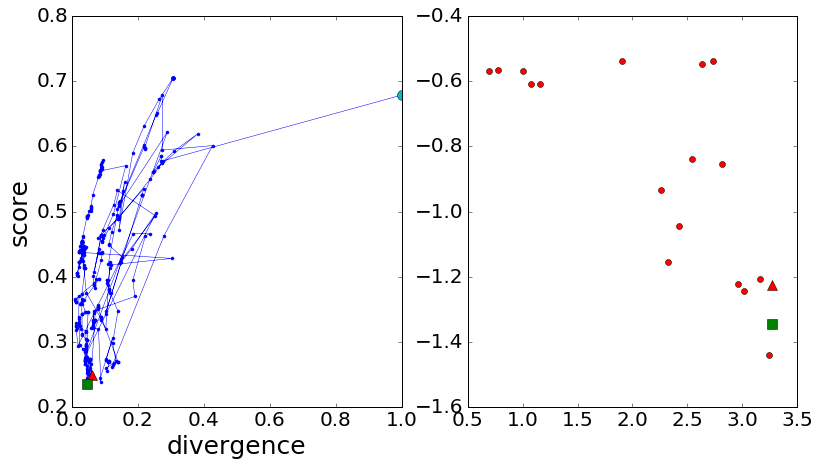

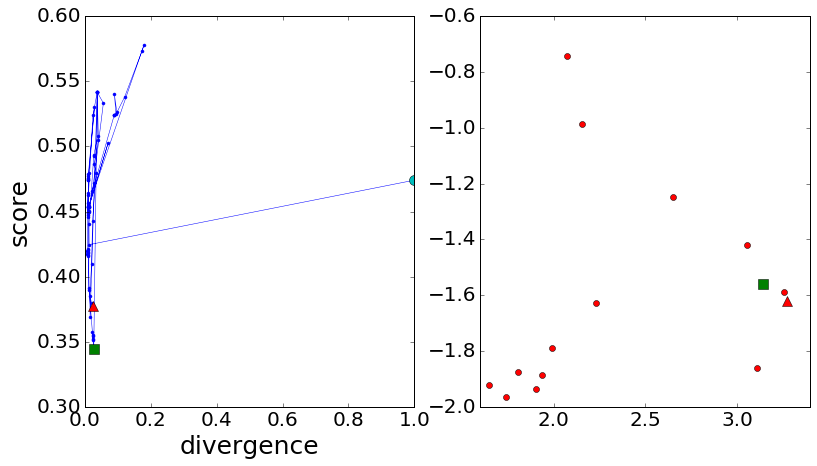

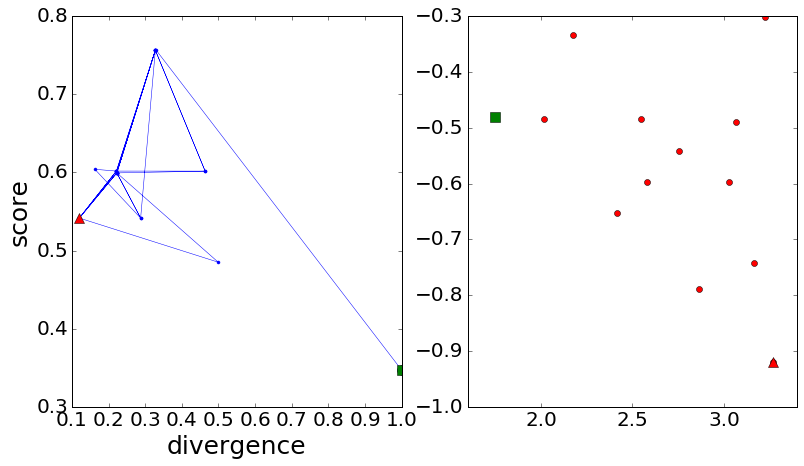

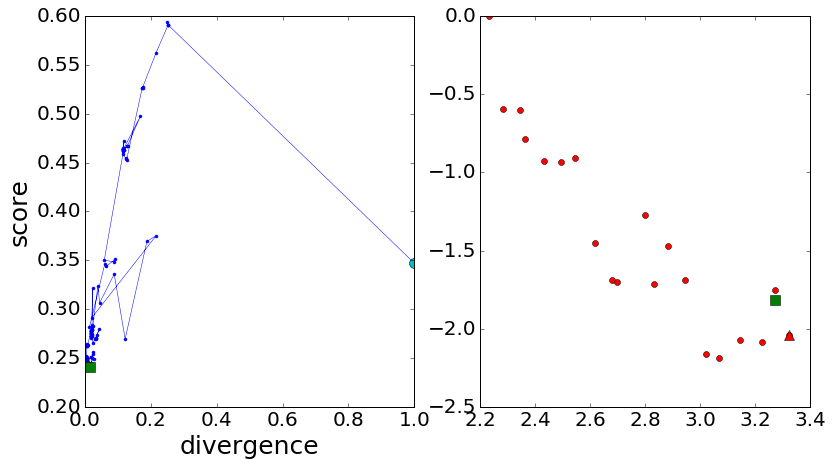

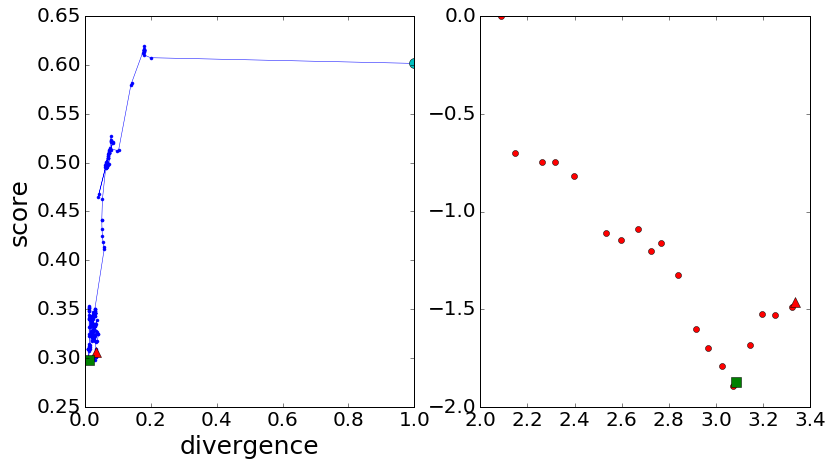

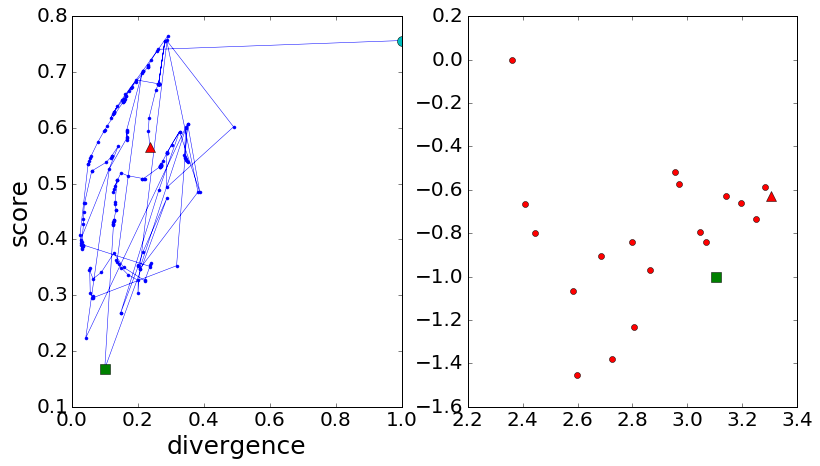

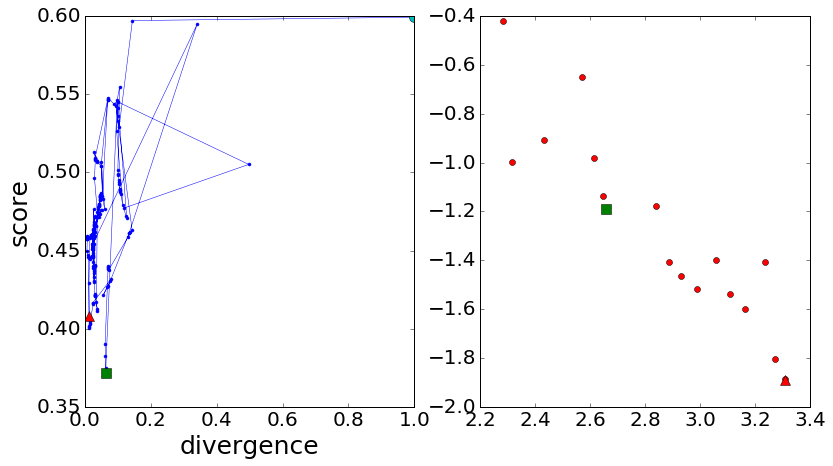

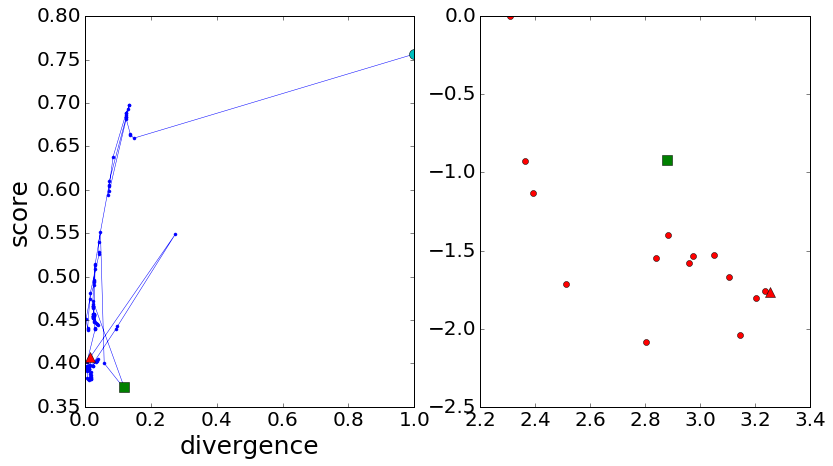

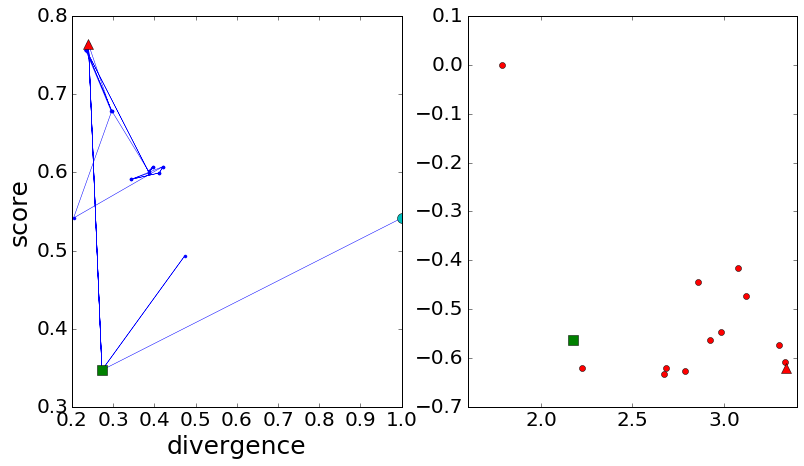

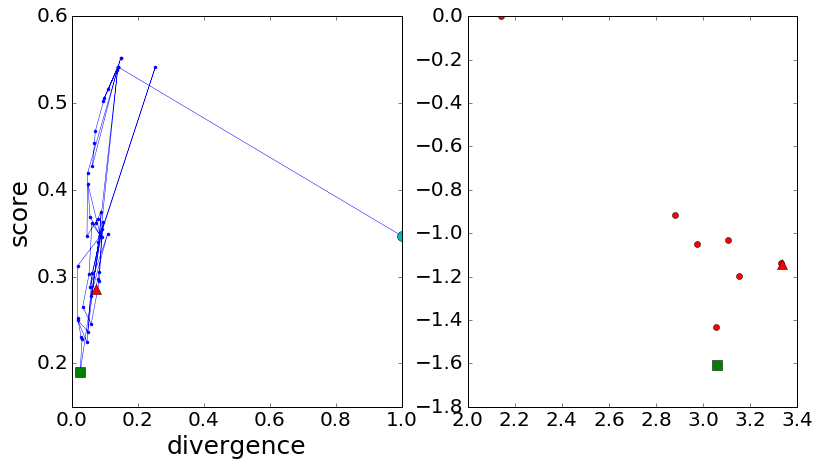

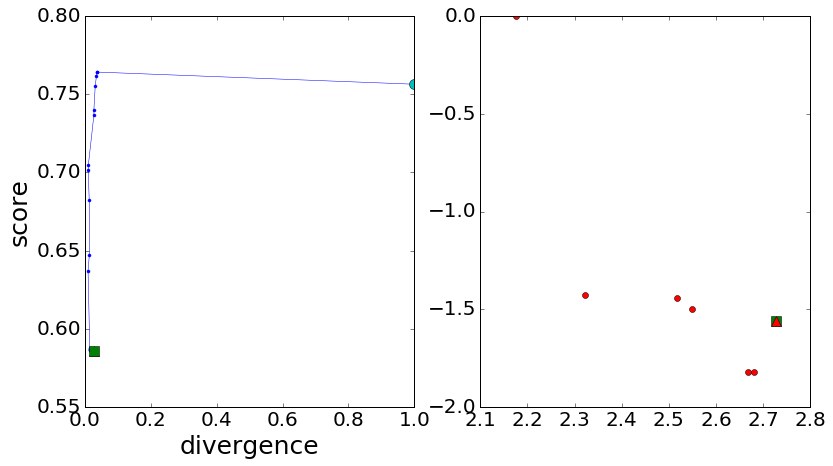

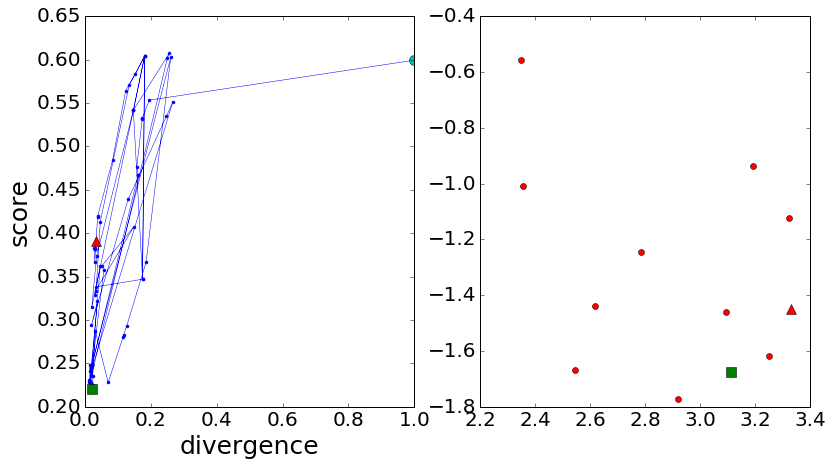

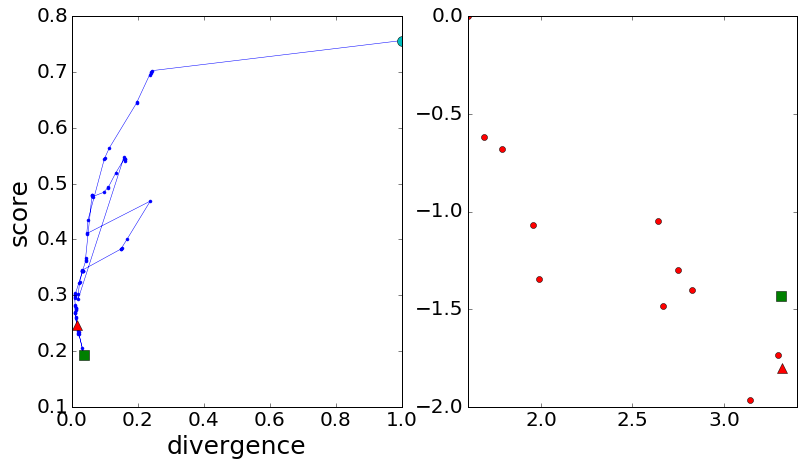

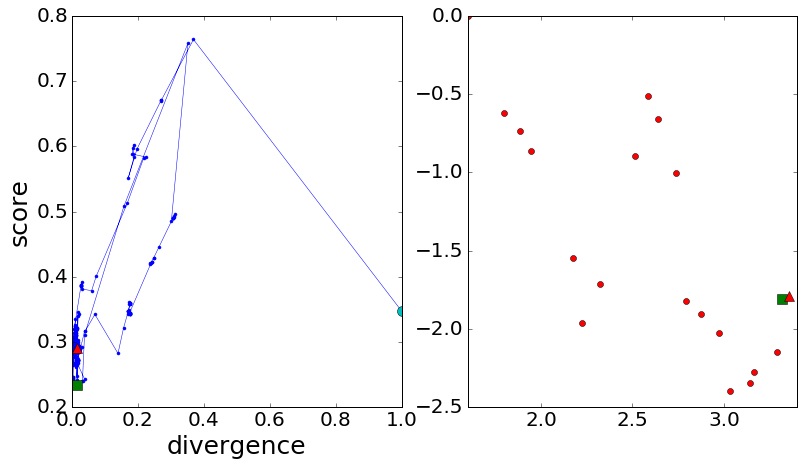

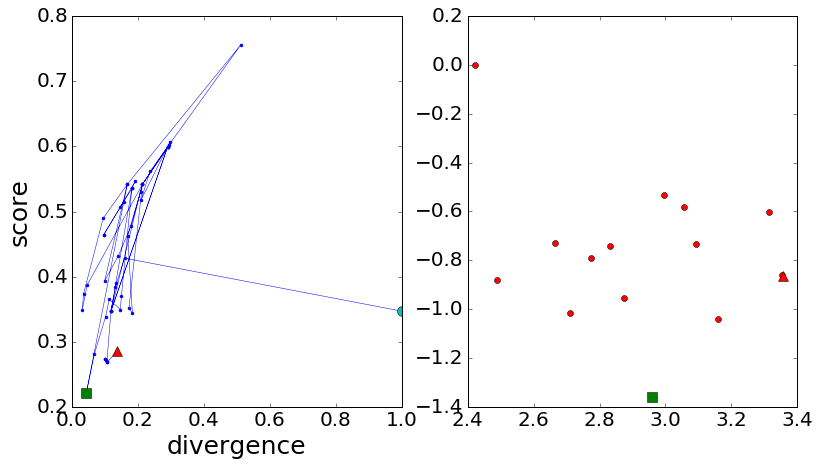

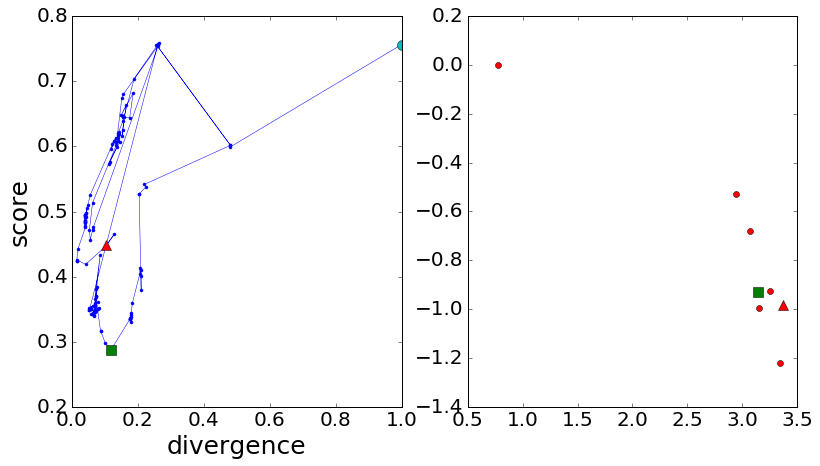

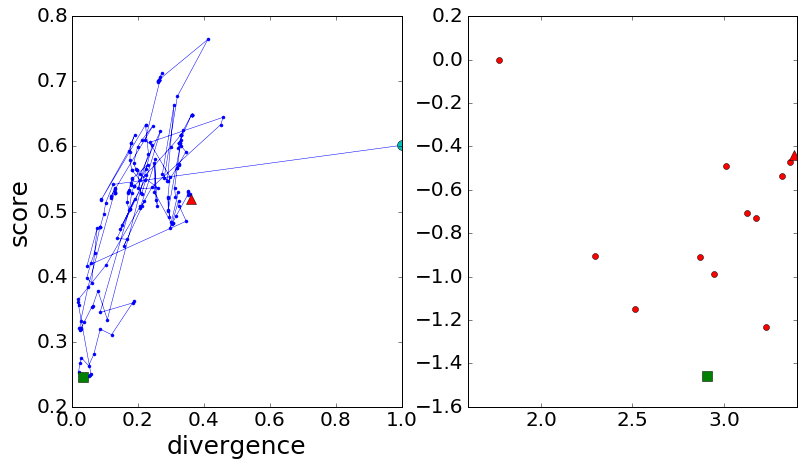

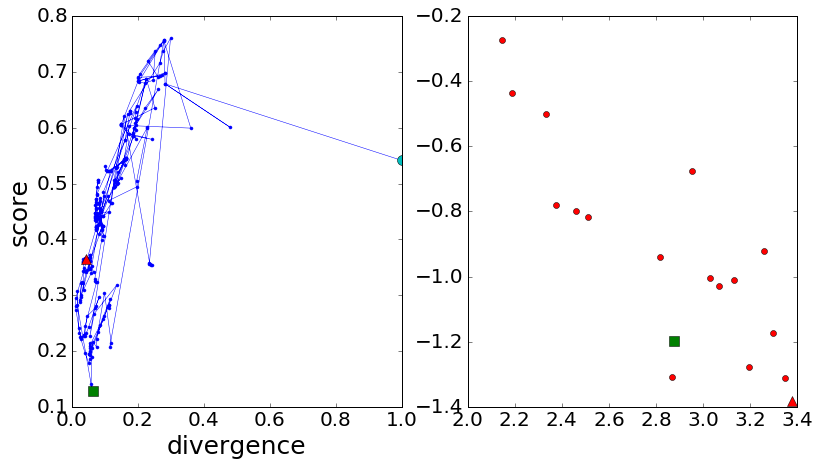

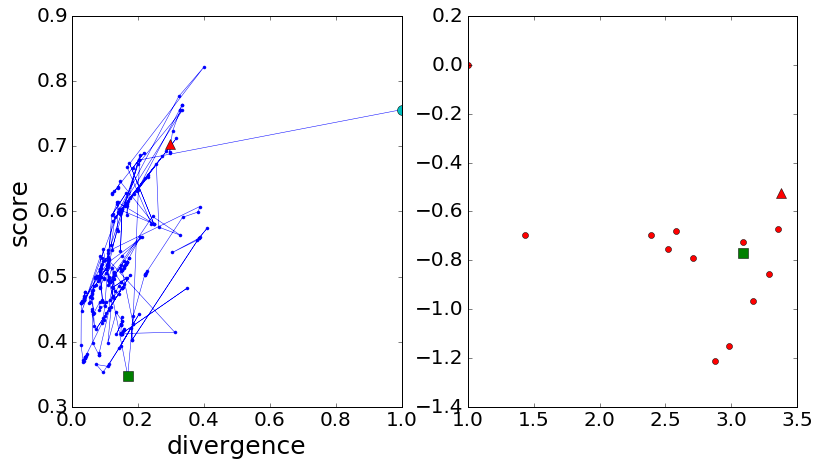

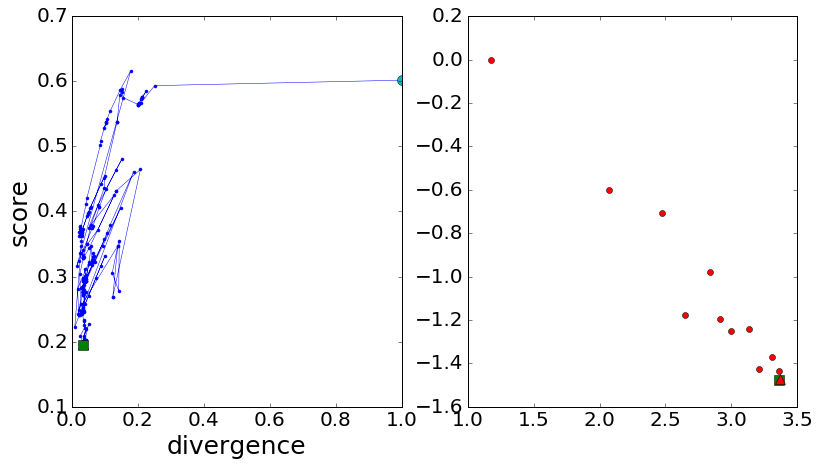

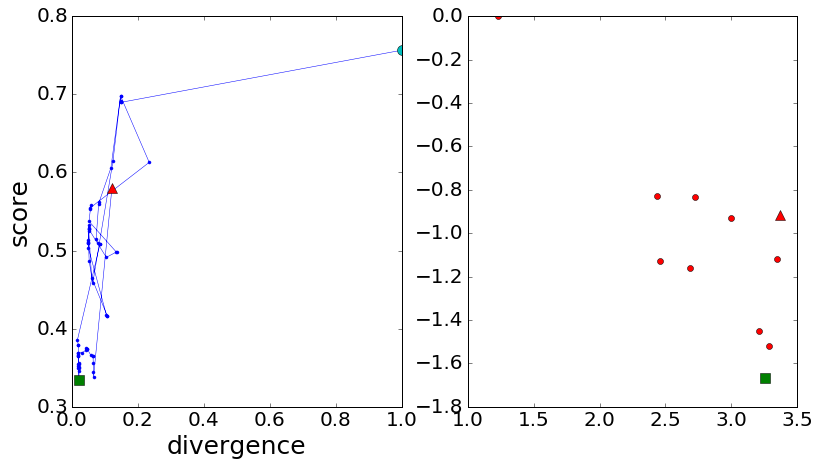

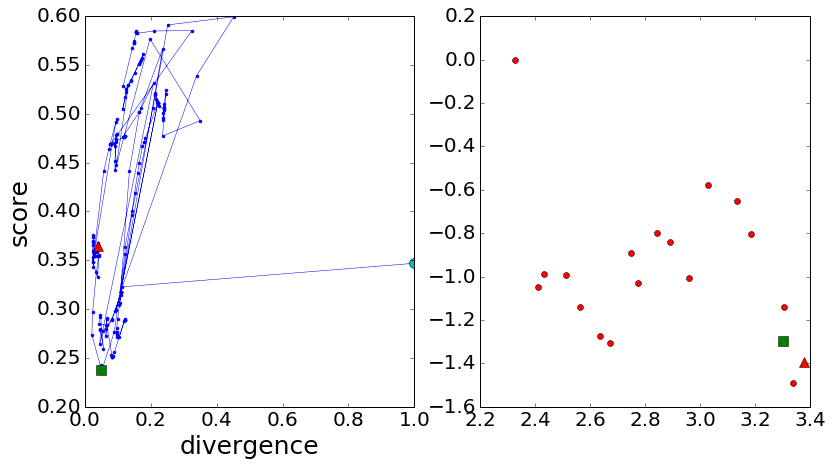

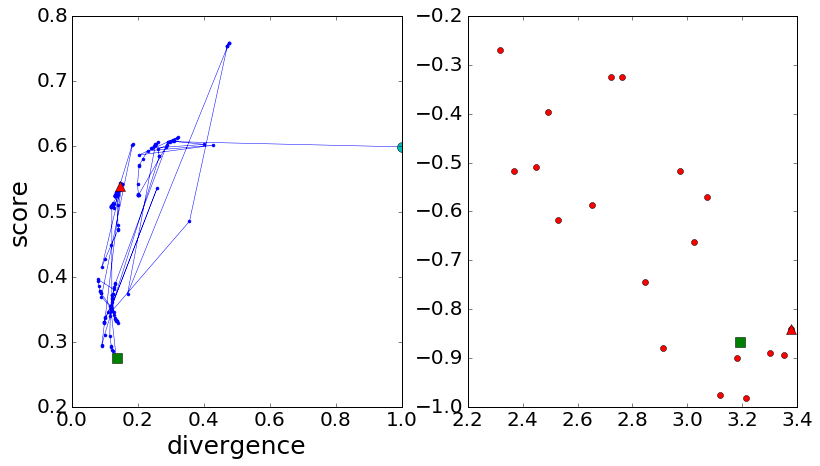

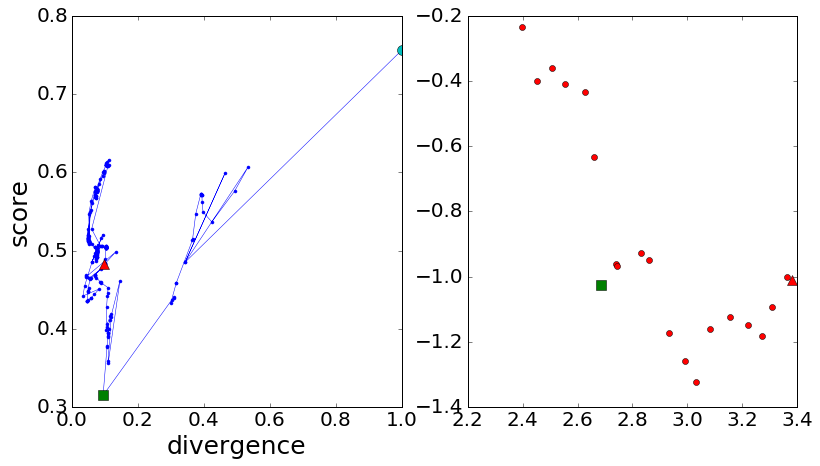

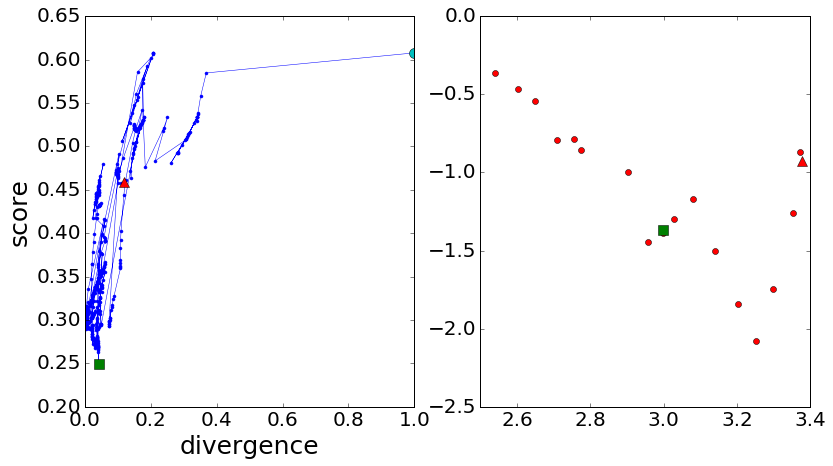

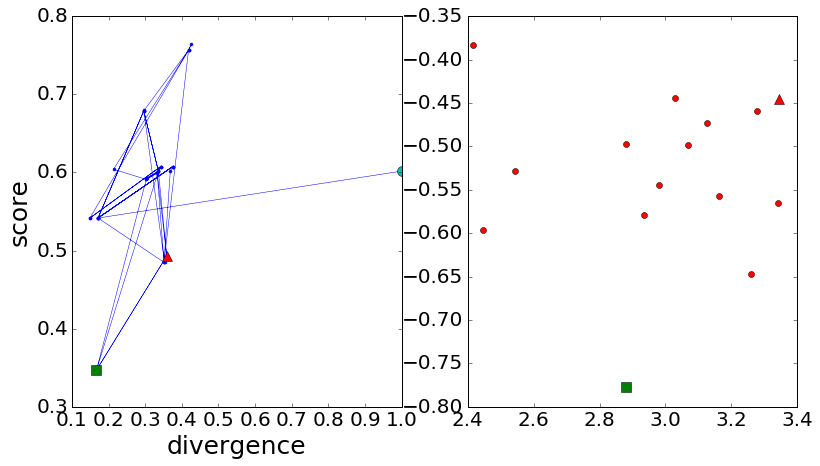

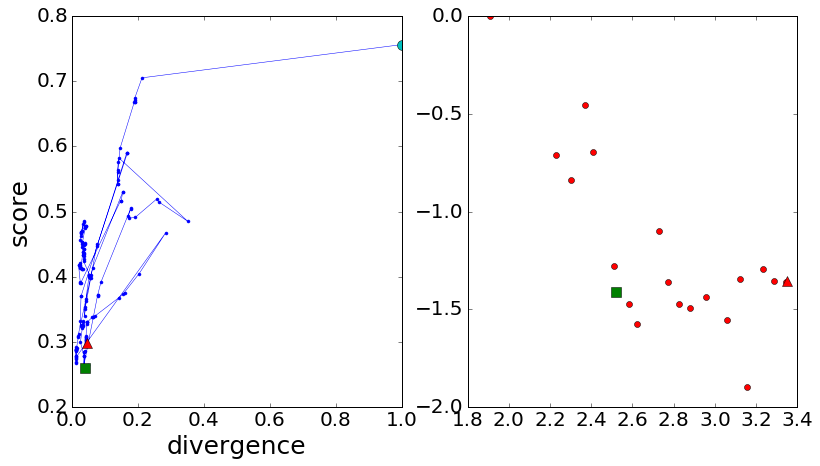

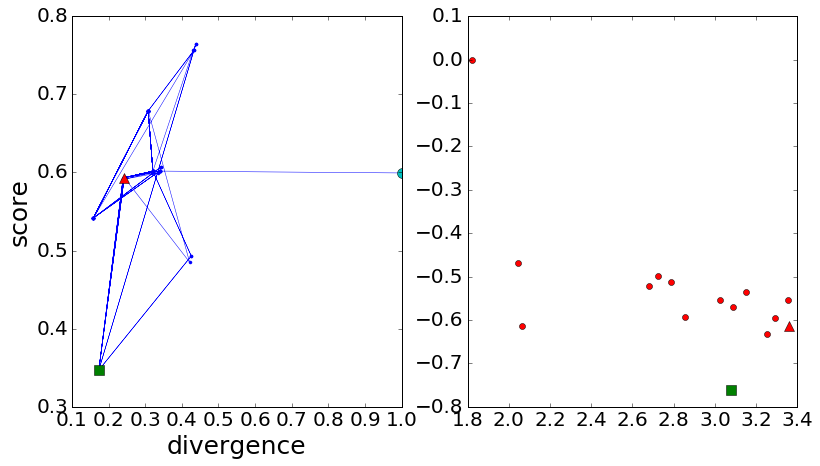

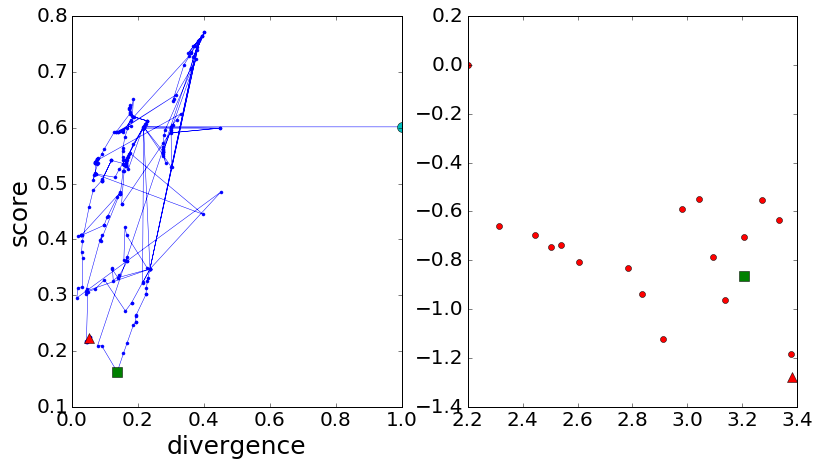

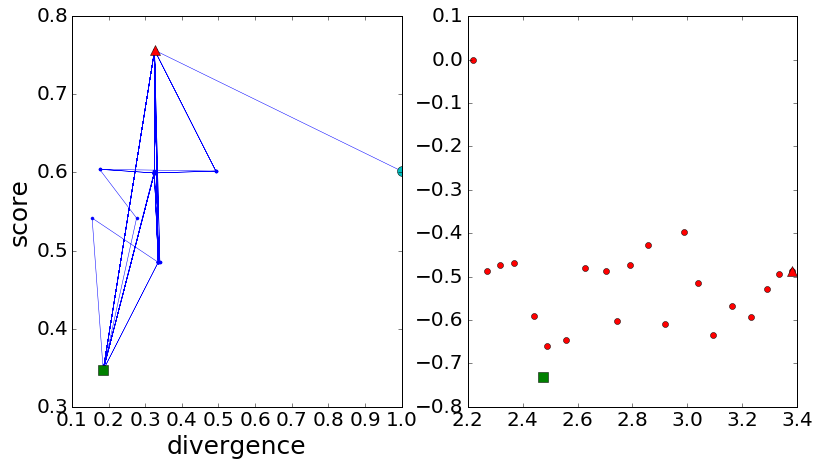

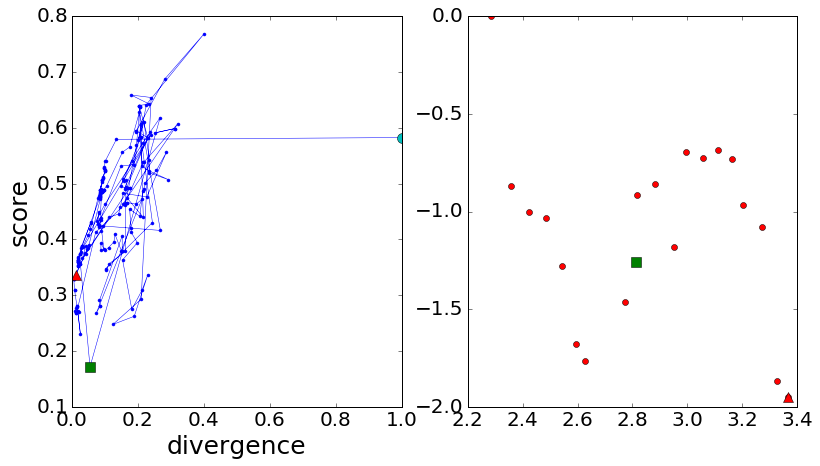

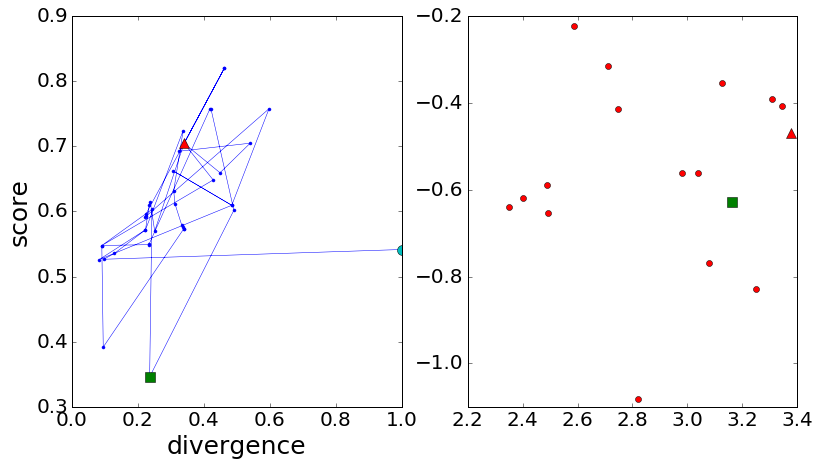

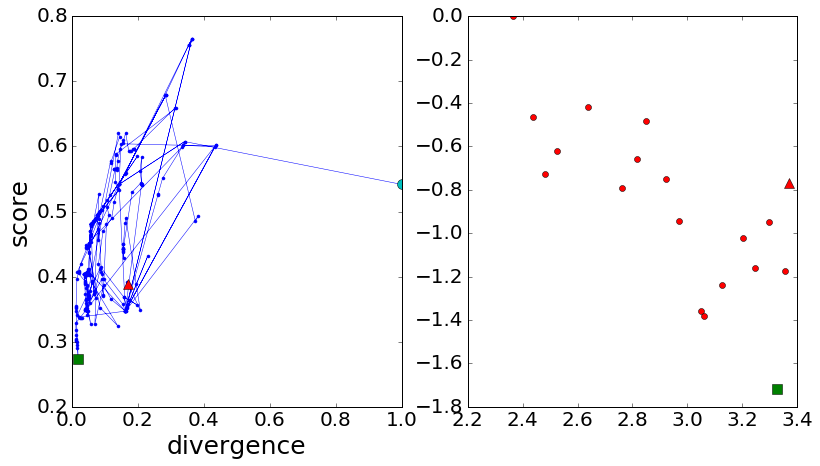

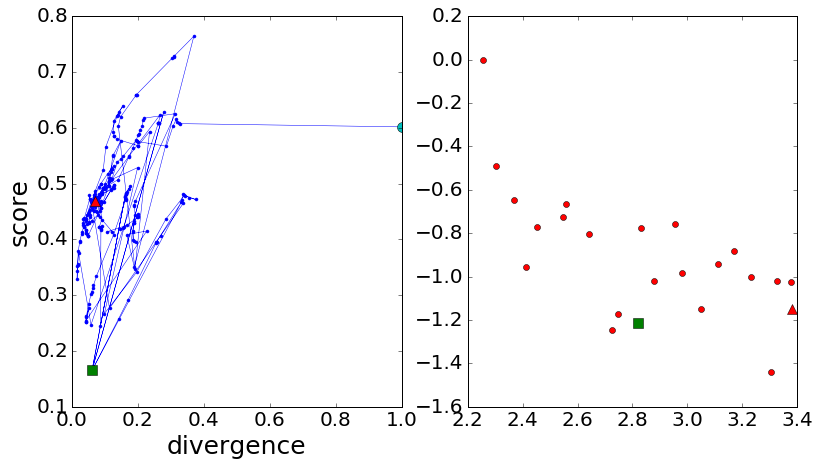

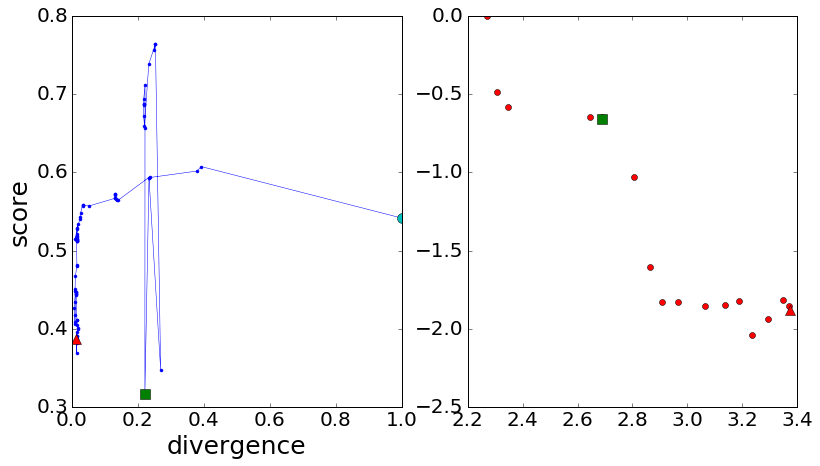

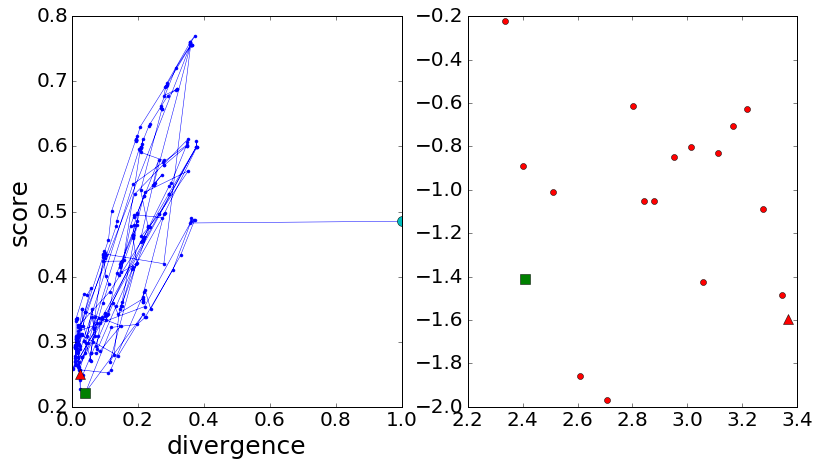

In [518]:
I = []
dDsquared = []
dDiversity = []
minJSD = []
slope = []
dScore = []
Score = []
Divergence = []
dDivergence = []

for k,key in enumerate(treatment_dic.keys()):
    V = []
    index = []
    
    
    jsd = simple_distances[key]
    cond = np.logical_not(np.isnan(jsd))
    minJSD.append(jsd[cond].values[-1])
    
    for i,v in enumerate(treatment_dic[key]):
        
        if not isinstance(v, list):continue # skip NaNs
        
        try:
            if not list(v)==V[-1]:
                V.append(list(v))
                index = np.append(index,i)
        except:
            V.append(list(v))
            index = np.append(index,i)
            
    
    distance = []
    divergence = [1]
    nPointDiversity = []
    nPointJSD = []
    score = []
    
    for i,v in enumerate(V):
        #distance = np.append(distance,Distance(V[i-1],v))
        #divergence = np.append(divergence,KL_divergence(V[i-1],v))
        #M = MixedN(V[:-1])
        #if M == None:
        #    M = V[i]

        if i>0:
            M = MixedN(V[:-1])
            divergence = np.append(divergence,JensenShannonDivergence(v,M))
            #if len(JensenShannonDivergence(v,M))>1:
            #print len(divergence),JensenShannonDivergence(v,M)
        
        nPointDiversity = np.append(nPointDiversity,Diversity(V[:i]))
        score = np.append(score,simple_distances[key][index[i]])
        
        try:
            nPointJSD = np.append(nPointJSD,N_point_JSD(V[:i]))
        except:
            continue


    
    diffDsquared = np.diff(nPointDiversity)**2
    diffDiversity = np.diff(nPointDiversity)
    diffScore = np.diff(score)
    diffDivergence = np.diff(divergence)
    
    I = np.concatenate([I,index[:-1]])
    dDsquared = np.concatenate([dDsquared,diffDsquared])
    dDiversity = np.concatenate([dDiversity,diffDiversity])
    dScore = np.concatenate([dScore,diffScore])
    Score = np.concatenate([Score,score[1:]])
    Divergence = np.concatenate([Divergence,divergence[1:]])
    dDivergence = np.concatenate([dDivergence,diffDivergence])
    #index = np.array(index)
    
    #pl.figure(3,(13,7))
    #pl.subplot(121)
    #index #= index[:-1]
    
    #B = binning(index,score/divergence,30)
    #pl.semilogy(B['bins'],B['mean'],'o-')
    #pl.ylabel("Divergence")
    
    x = divergence
    y = score
    
    #pl.figure(1)
    #pl.plot(len(score),min(score),'o')
    
    pl.figure(k+2,(13,7))
    pl.subplot(121)
    pl.plot(x,y,'.-',lw=0.5)
    pl.plot(x[0],y[0],'co',ms=10)
    pl.plot(x[-1],y[-1],'r^',ms=10)
    pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
    pl.xlabel("divergence")
    pl.ylabel("score")
    
    #x = diffDivergence
    #y = diffScore
    
    pl.subplot(122)
    cond = (index > 0)*(x > 0)
    lx = np.log10(index[cond])
    ly = np.log10(x[cond])
    B = binning(lx,ly,30)
    pl.plot(B['bins'],B['mean'],'ro')
    pl.plot(lx[np.argmin(score)],ly[np.argmin(score)],'gs',ms=10)
    pl.plot(lx[-1],ly[-1],'r^',ms=10)
    #pl.plot(x[1],y[1],'co',ms=10)
    #pl.plot(x[-1],y[-1],'r^',ms=10)
    #pl.plot(x[np.argmin(score)],y[np.argmin(score)],'gs',ms=10)
    #pl.xlabel("$\Delta divergence$")
    #pl.ylabel("$\Delta score$")

LinregressResult(slope=-0.077568561654124832, intercept=-0.12393457752400558, rvalue=-0.19963267962680709, pvalue=1.9881524756468775e-66, stderr=0.0044595285122749776)
LinregressResult(slope=-0.22233432973326855, intercept=-0.43828717704168718, rvalue=-0.16443241680117041, pvalue=2.3328366366958734e-45, stderr=0.015621870932980618)


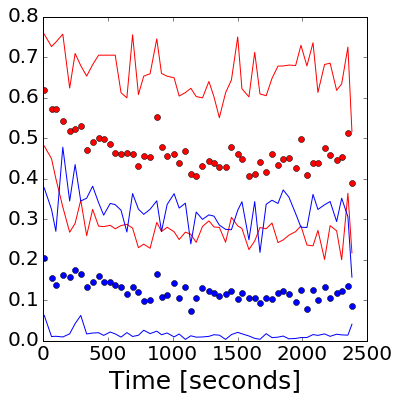

In [545]:
B = binning(I,Score,60,confinter=5)

pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

B = binning(I,Divergence,60,confinter=5)

pl.plot(B['bins'],B['mean'],'bo')
pl.plot(B['bins'],B['percUp'],'b-')
pl.plot(B['bins'],B['percDown'],'b-')
pl.xlabel("Time [seconds]")

LinregressResult(slope=-0.076472149981554896, intercept=-0.12736169327395735, rvalue=-0.16768551732337048, pvalue=2.1638205958523195e-46, stderr=0.0053091446341556716)
LinregressResult(slope=-0.26648799777678889, intercept=-0.30225294420507265, rvalue=-0.16808197848244341, pvalue=1.3210100278994219e-46, stderr=0.018456254451122242)


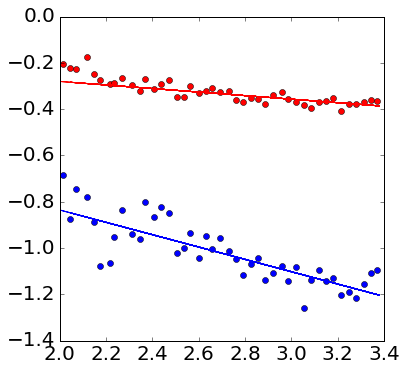

In [555]:
cond = (I > 100)*(Score > 0)
lx = np.log10(I[cond])
ly = np.log10(Score[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,60,confinter=5)
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(lx,lx*fit[0]+fit[1],'r-')

cond = (I > 100)*(Divergence > 0)
lx = np.log10(I[cond])
ly = np.log10(Divergence[cond])
fit = S.linregress(lx,ly)
print fit

B = binning(lx,ly,60,confinter=5)
pl.plot(B['bins'],B['mean'],'bo')
pl.plot(lx,lx*fit[0]+fit[1],'b-')




LinregressResult(slope=0.094094696663686014, intercept=-0.012397946011564437, rvalue=0.14796656001921665, pvalue=5.3717665259885864e-37, stderr=0.0073634587764010344)


(0, 0.6)

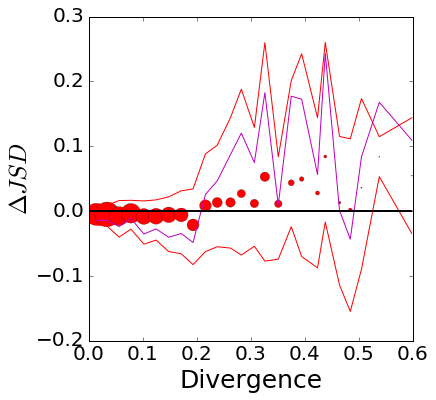

In [537]:
B = binning(Divergence,dScore,30,confinter=10)
#pl.plot(Divergence,dScore,'.',alpha=0.2)
fit = S.linregress(Divergence,dScore)
print fit
pl.scatter(B['bins'],B['mean'],s=0.5*B['nPoints'],color='r',marker='o',linewidths=0.2,edgecolors="black")
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

pl.plot(B['bins'],B['percUp'] + B['percDown'],'m-')

#pl.plot(Divergence,Divergence*fit[0]+fit[1],'k-')
pl.plot(Divergence,np.zeros_like(Divergence),'k-')
pl.xlabel("Divergence")
pl.ylabel("$\Delta JSD$")
pl.xlim(0,0.6)

LinregressResult(slope=0.25773004654294868, intercept=0.00055088440266067604, rvalue=0.31668583447632132, pvalue=1.1440331316256953e-169, stderr=0.009038056670274108)
-0.00576966432683 -0.00093613145283
-0.000129896269703 -0.000305292800196
0.0809883928217 0.0659111964572 

LinregressResult(slope=0.73344567875305833, intercept=-0.0016270192045653819, rvalue=0.36123015508024725, pvalue=4.6217884383924318e-208, stderr=0.022998695187406246)


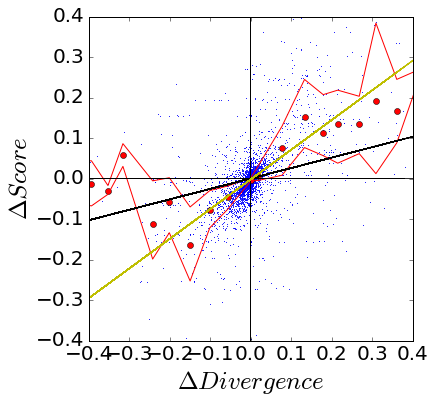

In [534]:
pl.plot(dDivergence,dScore,'.',alpha=1,ms=1)
B = binning(dDivergence,dScore,30,confinter=25)
pl.plot(B['bins'],B['mean'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
fit = S.linregress(dDivergence,dScore)
print fit
pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'k-')
pl.plot(dDivergence,np.zeros_like(Divergence),'k-',lw=0.2)
pl.plot(np.zeros_like(dScore),dScore,'k-',lw=0.2)
pl.xlabel("$\Delta Divergence$")
pl.ylabel("$\Delta Score$")
pl.xlim(-0.4,0.4)
pl.ylim(-0.4,0.4)

print np.mean(dDivergence),np.mean(dScore)
print np.median(dDivergence),np.median(dScore)
print np.std(dDivergence),np.std(dScore),"\n"
cond = (dDivergence < 0.1)*(dDivergence > -0.1)
fit = S.linregress(dDivergence[cond],dScore[cond])
print fit
pl.plot(dDivergence,dDivergence*fit[0]+fit[1],'y-')

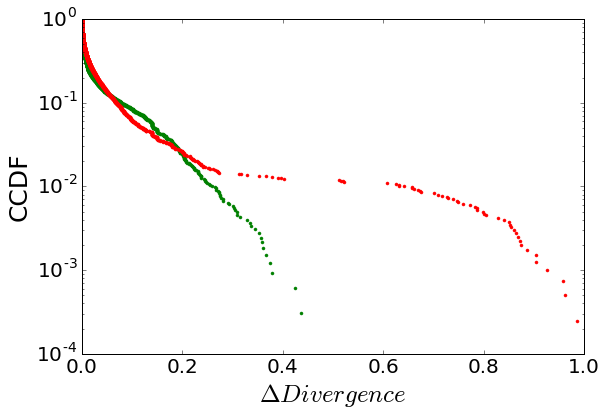

In [478]:
pl.figure(1,(9,6))
dD = dDivergence
cond = dD > 0
x,y = rankorder(dD[cond])
#pl.semilogy(x,y/float(y[-1]),'g.')
pl.semilogy(x,y/float(y[-1]),'g.')

cond = dD < 0
x,y = rankorder(-dD[cond])
#pl.semilogy(x,y/float(y[-1]),'r.')
pl.semilogy(x,y/float(y[-1]),'r.')

pl.xlabel("$\Delta Divergence$")
pl.xlim(xmin=10**-6)
pl.ylabel("CCDF")

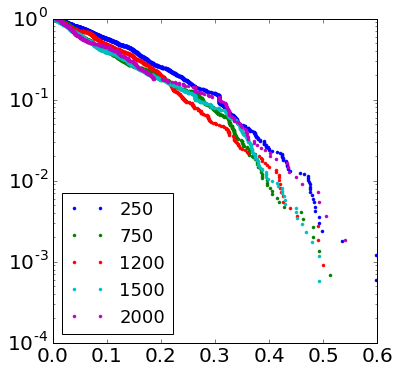

In [536]:
condition = [250, 750, 1200, 1500, 2000, 2200]
for c,cx in enumerate(condition[:-1]):
    cond = (I > cx)*(I < condition[c+1])
    x,y = rankorder(Divergence[cond])
    pl.semilogy(x,y/float(y[-1]),'.',label=cx)

pl.legend(loc=0)

In [334]:
y[-1]

126

SpearmanrResult(correlation=-0.058697021300646177, pvalue=1.6074881375803575e-06)
LinregressResult(slope=-1.4283824996362737, intercept=1.3067763819288598, rvalue=-0.95061748748112929, pvalue=4.5893895503621626e-10, stderr=0.11310632940087523)
LinregressResult(slope=-0.19431481989054389, intercept=-1.6299526341199422, rvalue=-0.53476538759571612, pvalue=0.018322494091482424, stderr=0.074468941481711085)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:5: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7345 but corresponding boolean dimension is 7297
/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:7: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7345 but corresponding boolean dimension is 7297


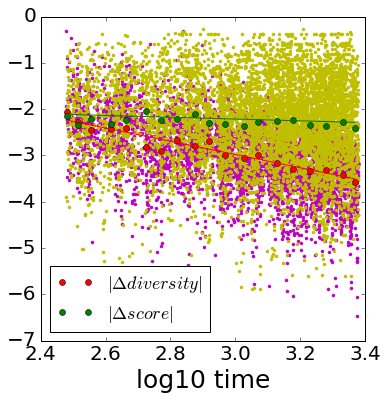

In [197]:
cond = (I > 300)*(dDiversity !=0)*(dScore !=0)*(np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(np.logical_not(np.isnan(dScore)))
lx = np.log10(I[cond])
ly = np.log10(np.abs(dDiversity[cond]))
lz = np.log10(np.abs(dScore[cond]))
lzz = np.log10(Score[cond])

print S.spearmanr(dDiversity[cond],Score[cond])

Bdiversity = binning(lx,ly,30)
Bscore = binning(lx,lz,30)

fitDiversity = S.linregress(Bdiversity['bins'],Bdiversity['median'])
print fitDiversity
fitScore = S.linregress(Bscore['bins'],Bscore['median'])
print fitScore

pl.plot(lx,ly,'m.')
pl.plot(lx,lz,'y.')

pl.plot(Bdiversity['bins'],Bdiversity['mean'],'ro', label="$|\Delta diversity|$")
pl.plot(Bdiversity['bins'],Bdiversity['bins']*fitDiversity[0]+fitDiversity[1],'r-')
pl.plot(Bscore['bins'],Bscore['mean'],'go',label = "$|\Delta score|$")
pl.plot(Bscore['bins'],Bscore['bins']*fitScore[0]+fitScore[1],'g-')

pl.legend(loc=0)
pl.xlabel("log10 time")

LinregressResult(slope=0.19799565961791726, intercept=-1.6734917409997143, rvalue=0.14163139463678068, pvalue=3.0981596922755607e-31, stderr=0.016945939194407334)


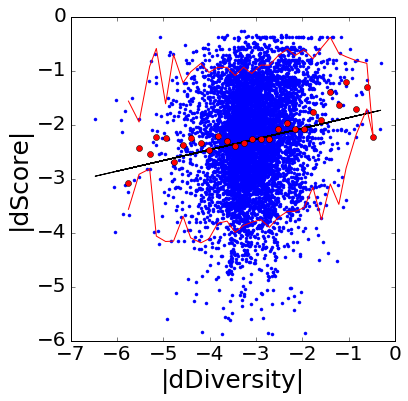

In [191]:
B = binning(ly,lz,30)
fit = S.linregress(ly,lz)
print fit
pl.plot(ly,lz,'.')
pl.plot(ly,ly*fit[0] + fit[1],'k-')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')

pl.xlabel("|dDiversity|")
pl.ylabel("|dScore|")

LinregressResult(slope=nan, intercept=nan, rvalue=nan, pvalue=nan, stderr=nan)


LinregressResult(slope=0.038557049031995867, intercept=-2.8487213724831171, rvalue=0.2806457167122659, pvalue=0.14030196209336671, stderr=0.02537753321942136)


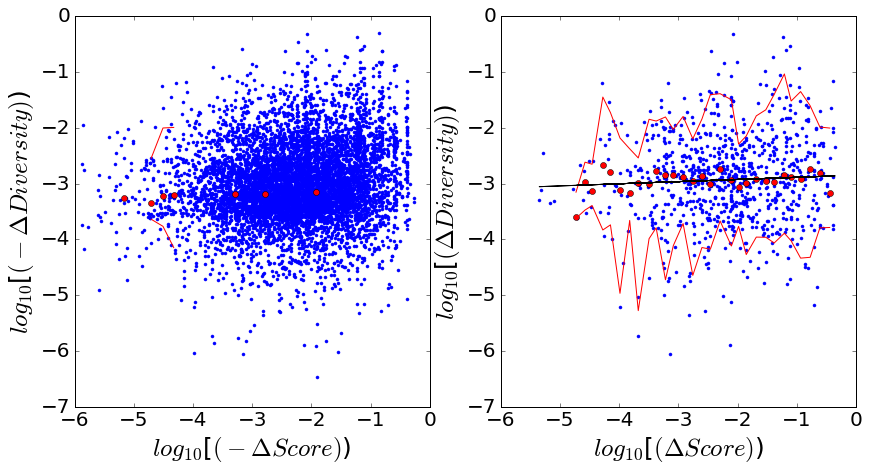

In [104]:
pl.figure(1,(14,7))
pl.subplot(121)
cond = (np.abs(dScore) > 10**-6)

lx = np.log10(np.abs(dScore[cond]))
ly = np.log10(np.abs(dDiversity[cond]))

B = binning(lx,ly,30)
#fit = S.linregress(lx,ly)
#print fit
fit = S.linregress(B['bins'],B['median'])
print fit

pl.plot(lx,ly,'.')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
pl.plot(lx,lx*fit[0]+fit[1],'k-')
pl.xlabel("$log_{10}$[$(- \Delta Score)$)")
pl.ylabel("$log_{10}$[$(- \Delta Diversity)$)")

print "\n"
pl.subplot(122)
cond = (np.abs(dScore) > 10**-6)*(dScore > 0)*(dDiversity > 0)

lx = np.log10(np.abs(dScore[cond]))
ly = np.log10(np.abs(dDiversity[cond]))

B = binning(lx,ly,30)
#fit = S.linregress(lx,ly)
#print fit
fit = S.linregress(B['bins'],B['median'])
print fit

pl.plot(lx,ly,'.')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
pl.plot(lx,lx*fit[0]+fit[1],'k-')
pl.xlabel("$log_{10}$[$(\Delta Score)$)")
pl.ylabel("$log_{10}$[$(\Delta Diversity)$)")

3934
LinregressResult(slope=4.3944914624471547, intercept=10.691669856789897, rvalue=0.60482216724954596, pvalue=0.00050992116526526901, stderr=1.1135476040031342)


3203
LinregressResult(slope=5.5971975044131721, intercept=14.379208078774507, rvalue=0.74672643553682427, pvalue=3.2837321042565557e-06, stderr=0.95947707182196496)


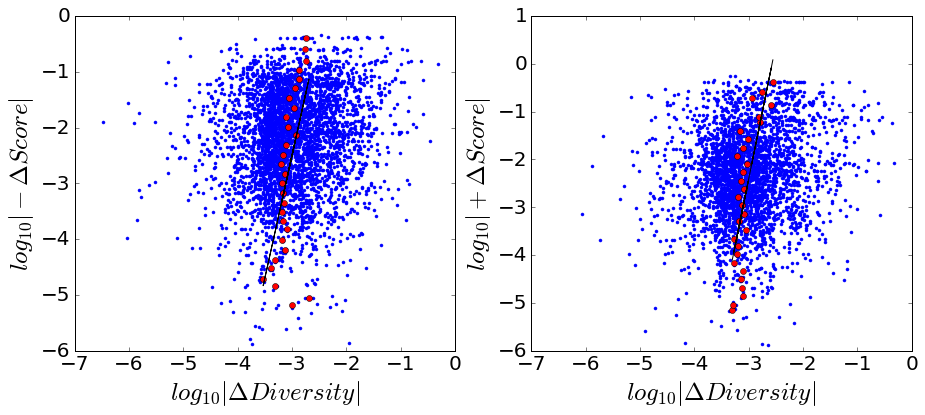

In [141]:
pl.figure(1,(15,6))
pl.subplot(121)
cond = (np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(dScore < 0)

lx = np.log10(np.abs(dScore)[cond])
ly = np.log10(np.abs(dDiversity)[cond])

print len(lx)

B = binning(lx,ly,30)
#fit = S.linregress(ly,lx)
#print fit
fit = S.linregress(B['median'],B['bins'])
print fit


pl.plot(ly,lx,'.')
pl.plot(B['median'],B['bins'],'ro')
pl.plot(B['median'],B['median']*fit[0] + fit[1],'k-')
pl.ylabel("$log_{10}|-\Delta Score|$")
pl.xlabel("$log_{10}|\Delta Diversity|$")

print "\n"
pl.subplot(122)
cond = (np.abs(dScore) > 10**-6)*(np.logical_not(np.isnan(dDiversity)))*(dScore > 0)

lx = np.log10(np.abs(dScore)[cond])
ly = np.log10(np.abs(dDiversity)[cond])

print len(lx)

B = binning(lx,ly,30)
#fit = S.linregress(ly,lx)
#print fit
fit = S.linregress(B['median'],B['bins'])
print fit


pl.plot(ly,lx,'.')
pl.plot(B['median'],B['bins'],'ro')
pl.plot(B['median'],B['median']*fit[0] + fit[1],'k-')
pl.ylabel("$log_{10}|+\Delta Score|$")
pl.xlabel("$log_{10}|\Delta Diversity|$")

SpearmanrResult(correlation=-0.071009249490237916, pvalue=1.6161985157812749e-09)

LinregressResult(slope=0.20023638988869738, intercept=-3.4529586172562912, rvalue=0.14534905041250121, pvalue=1.3324770111337715e-16, stderr=0.024079522688562748)
LinregressResult(slope=0.20977174435099163, intercept=-3.1296886384914266, rvalue=0.7354165931513571, pvalue=5.4992366831536043e-06, stderr=0.037197594678332814)


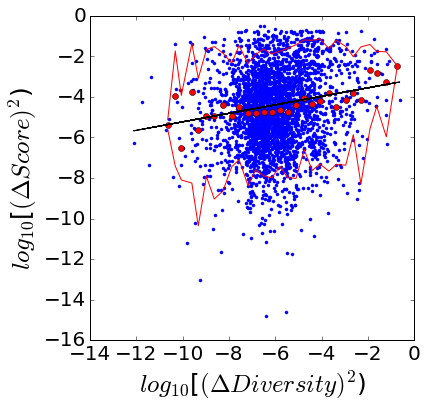

In [66]:
ly = np.log10(dScore**2)
lx = np.log10(dDsquared)

cond = (ly > -15)*np.logical_not(np.isnan(lx))*(dScore > 0)
B = binning(lx[cond],ly[cond],30)
fit = S.linregress(lx[cond],ly[cond])
print fit
fit = S.linregress(B['bins'],B['median'])
print fit
pl.plot(lx[cond],ly[cond],'.')
pl.plot(B['bins'],B['median'],'ro')
pl.plot(B['bins'],B['percUp'],'r-')
pl.plot(B['bins'],B['percDown'],'r-')
pl.plot(lx[cond],lx[cond]*fit[0]+fit[1],'k-')

pl.ylabel("$log_{10}$[$(\Delta Score)^{2}$)")
pl.xlabel("$log_{10}$[$(\Delta Diversity)^{2}$)")

LinregressResult(slope=-0.016404869696914712, intercept=0.38966772339298922, rvalue=-0.3764214346114802, pvalue=0.11218136379286889, stderr=0.009792538366506771)


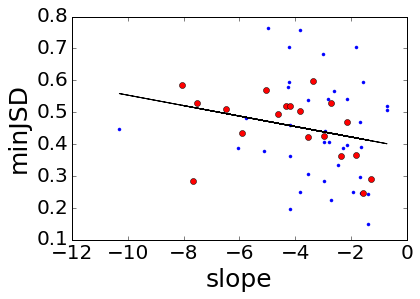

In [651]:
slope = np.array(slope)
minJSD = np.array(minJSD)
B = binning(slope,minJSD,30)
cond = slope > -6
fit = S.linregress(slope[cond],minJSD[cond])
fit = S.linregress(B['bins'],B['mean'])
print fit
pl.plot(slope,minJSD,'.')
pl.plot(slope,slope*fit[0]+fit[1],'k-')
pl.plot(B['bins'],B['median'],'ro')
pl.xlabel("slope")
pl.ylabel("minJSD")

LinregressResult(slope=-2.7564598056145821, intercept=2.3175342623384854, rvalue=-0.51070443892225093, pvalue=0.0, stderr=0.055743059887595002)


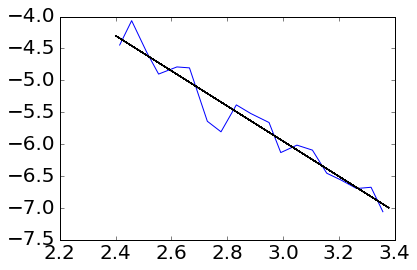

In [595]:
cond = (I > 250)*(dDsquared > 0)
lx = np.log10(I[cond])
ly = np.log10(dDsquared[cond])
B = binning(lx,ly,30)
fit = S.linregress(lx,ly)
print fit
pl.plot(B['bins'],B['mean'])
pl.plot(lx,lx*fit[0]+fit[1],'k-')

300

In [478]:
print MixedN(V)
print N_point_JSD(V)
print Diversity(V)

[ 0.17425933  0.19995344  0.02968222  0.01615929  0.04617102  0.00116602
  0.4290562   0.10355247]
1.35868374085
0.349687383809


In [458]:
ls = V
lamb = 1.0/len(ls)
total = np.zeros(np.shape(V)[1])

In [466]:
test = list(v)
TEST = []

In [469]:
TEST.append(test)

In [125]:
final_simple = np.array(simple_distances)[-1]
final_complex = np.array(complex_distances)[-1]

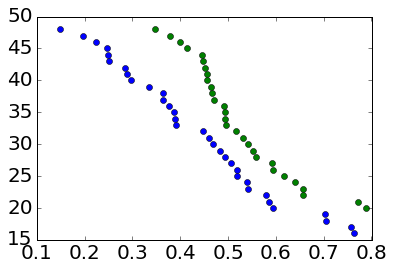

In [128]:
x,y = rankorder(final_simple)
pl.plot(x,y,'o')

x,y = rankorder(final_complex)
pl.plot(x,y,'o')

In [132]:
treatment = "complex"
data_dic = pd.read_pickle(dir + "Data/%s_models"%treatment)

with open(dir + 'Data/%sG'%treatment, 'r') as f:
    G = jp.decode(f.read())

### 1. Power Law Decay of JS-Distance

max:  0.44118421752 0.966666666667
0 LinregressResult(slope=-0.18711637033737952, intercept=-0.36940865517389371, rvalue=-0.90353416285244559, pvalue=0.0, stderr=0.0018190550173387556)
max:  0.46745556851 4.43333333333
1 LinregressResult(slope=-0.13711638867495976, intercept=-0.32436160848582596, rvalue=-0.93198160748063685, pvalue=0.0, stderr=0.001132441899694534)


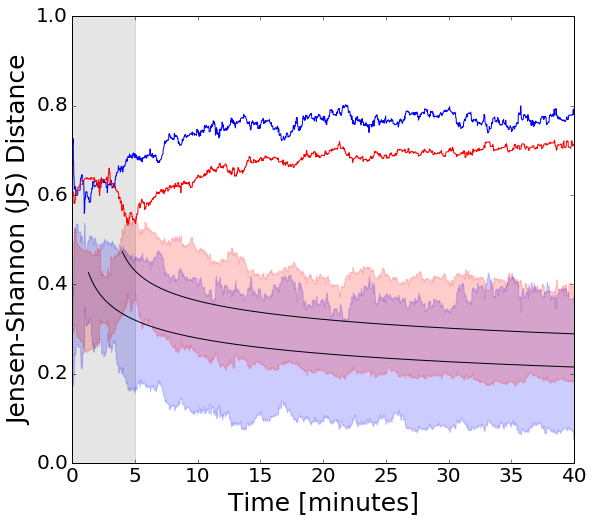

In [221]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=False)
complex_distances = loadDistances(treatment="complex",remove_duplicates=False)

pl.figure(1,(9,8))
color = ["blue","red"]
tc = [0.3,3]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    #array = np.array(dfSimpleLearning)

    array = np.array(kx)
    X = []
    Y = []
    mean = []
    median = []
    std = []
    points = []
    percDown = []
    percUp = []
    
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
        
        y = ix[cond]
        x = np.zeros_like(y)+i
        X = np.append(X,x)
        Y = np.append(Y,y)
        median = np.append(median,np.median(ix[cond]))
        mean  = np.append(mean,np.mean(ix[cond]**2))
        std = np.append(std,np.std(ix[cond]))
        points = np.append(points,float(len(ix[cond])))
        percDown = np.append(percDown,np.percentile(ix[cond],1))
        percUp = np.append(percUp,np.percentile(ix[cond],99))
      
    #print y
    #pl.figure(3)
    #B = binning(X,Y,500)
    #pl.plot(B['bins'],B['mean'],'.',color=color[k])
    
    print "max: ",np.max(mean),np.argmax(mean)/60.
    
    pl.figure(1)
    t = np.arange(1,len(mean)+1)/60.
    pl.plot(t,1-mean,color=color[k])
    pl.fill_between(t,mean-std,mean+std,color=color[k],alpha = 0.2)
    #pl.plot(t,percDown,'-.',color=color[k])
    #pl.plot(t,percUp,'-.',color=color[k])
    
    xShade = np.arange(0,6)
    pl.fill_between(xShade,np.zeros_like(xShade),np.zeros_like(xShade)+1,color="k",alpha=0.05)
    
    
    
    for j,jx in enumerate([mean,percDown,mean-std,mean+std][:1]):
        t = t - tc[k] + 1
        y = jx
        cond = (t > 1)*(y > 0)
        lt = np.log10(t[cond])
        ly = np.log10(y[cond])

        fit = S.linregress(lt,ly)
        print k,fit

        pl.plot(10**lt+tc[k],10**(lt*fit[0]+fit[1]),'k-')

    
pl.figure(1)    
pl.xlabel("Time [minutes]")
pl.ylabel("Jensen-Shannon (JS) Distance")
pl.xlim(0,40)
#pl.ylim(0.25,0.85)
pl.savefig(dir + "Figures/decay_simple_complex.eps")

### Distribution of JS distance Jump Sizes

In [29]:
simple_distances = loadDistances(treatment="simple",remove_duplicates=True)
complex_distances = loadDistances(treatment="complex",remove_duplicates=True)


simple treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.02938281  0.01412159]
negative JS distance: 
LinregressResult(slope=-1.1376997680202301, intercept=-5.4619579503431597, rvalue=-0.90394660040574659, pvalue=1.4636579928606038e-37, stderr=0.054649070370008136)
positive JS distance: 
LinregressResult(slope=-1.5464668071594736, intercept=-6.2838712283635498, rvalue=-0.94592686007109361, pvalue=9.4823052244586086e-48, stderr=0.054698216933635573)

complex treatment
0.0
[ 0.  0.]
[ 0.  0.]
[-0.0143648   0.00691525]
negative JS distance: 
LinregressResult(slope=-1.2335044852597559, intercept=-5.8928327001812084, rvalue=-0.9275785664386339, pvalue=2.7225957855814992e-58, stderr=0.043245673537344563)
positive JS distance: 
LinregressResult(slope=-1.5030644976529661, intercept=-6.4287155410938226, rvalue=-0.93065306075983179, pvalue=1.5162505229956753e-55, stderr=0.053284760589504453)


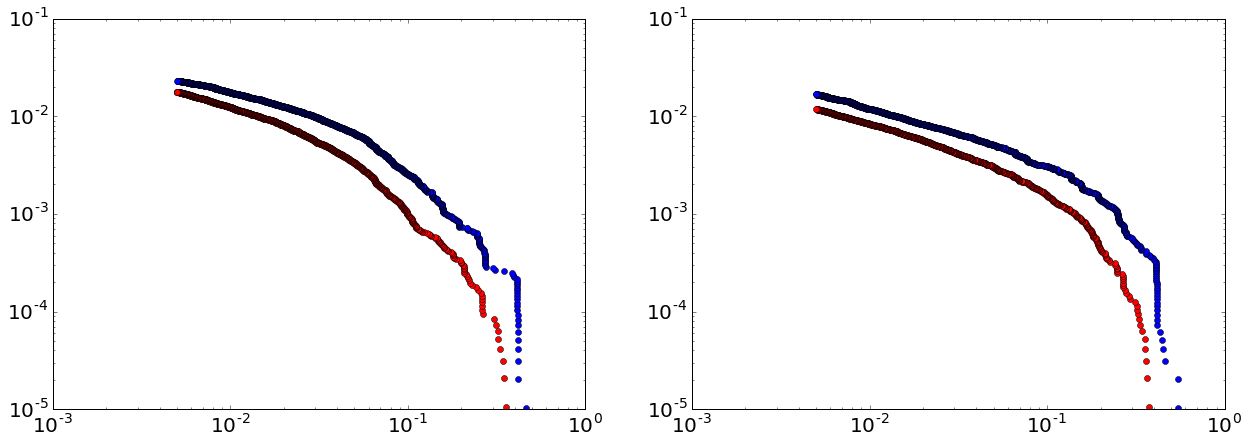

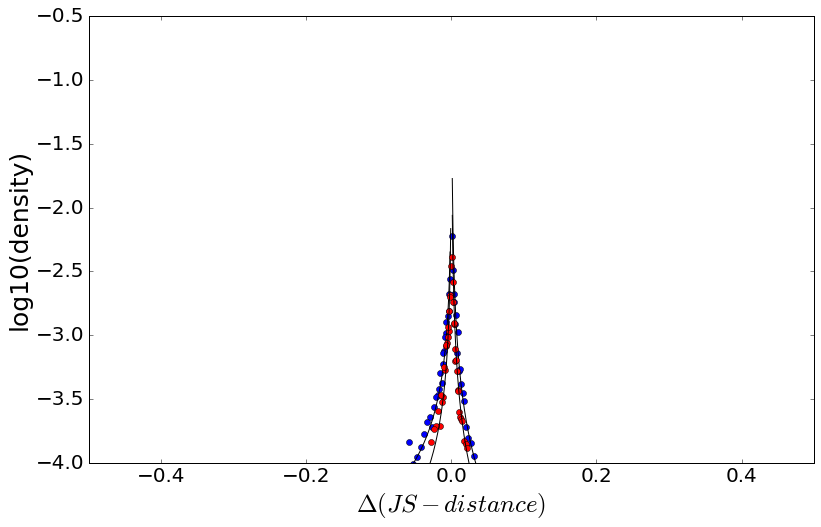

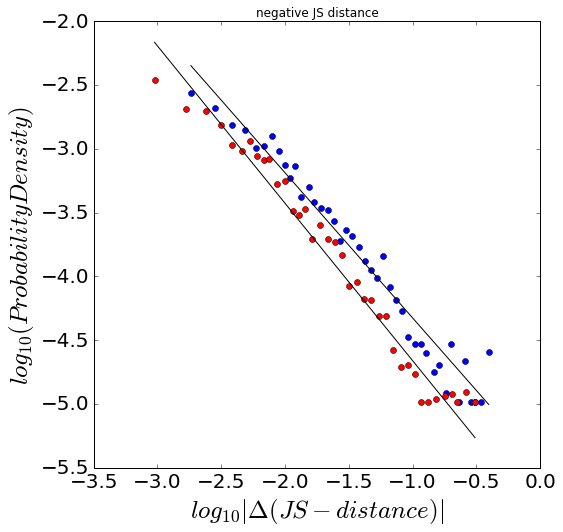

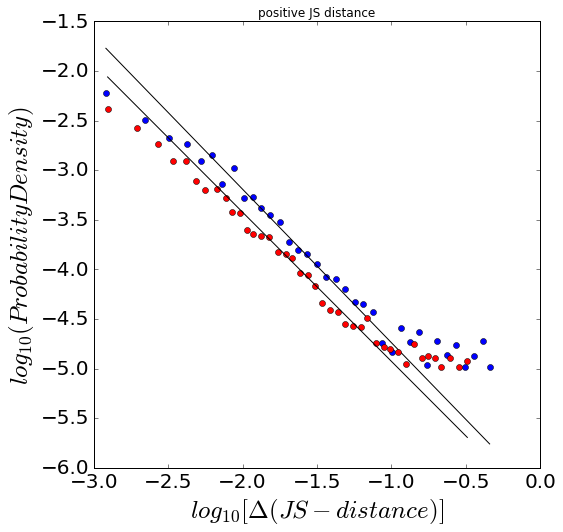

In [227]:
numbins = 50
#pl.figure(1,(9,7))
color = ["blue","red"]
for k,kx  in enumerate([simple_distances,complex_distances][:]):
    
    if k==0:
        print "\nsimple treatment"
    elif k == 1:
        print "\ncomplex treatment"
 

    array = np.array(zip(*np.array(kx)))
    
    deltaJSd = [] 
    for i,ix in enumerate(array):
        cond = np.logical_not(np.isnan(ix))
        
        if not len(ix[cond]):
            continue
            
        y = np.diff(ix[cond])[:]
        deltaJSd = np.append(deltaJSd,y)
    
    
    #cond = (deltaJSd < 0)*(deltaJSd >= -0.01)
    #deltaJSd[cond] = 0.00
    
    #cond = (deltaJSd > 0)*(deltaJSd <= 0.01)
    #deltaJSd[cond] = 0.00
    
    pl.figure(1,(21,7))

    pl.subplot(121)
    x,y = rankorder(-deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    
    pl.subplot(122)
    x,y = rankorder(deltaJSd)
    cond = x > 0.005
    pl.loglog(x[cond],y[cond]/float(y[-1]),'o',color=color[k])
    

    
    
    
    pl.figure(2,(13,8))
    pl.xlabel("$\Delta(JS-distance)$")
    pl.ylabel("log10(density)")
    pl.xlim(-0.5,0.5)
    pl.ylim(-4,-0.5)
    
    
    H = np.histogram(deltaJSd,bins=1000)
    x = H[1][1:]
    y = H[0]/float(np.sum(H[0]))
    
    print np.median(deltaJSd)
    print np.percentile(deltaJSd,(25,75))
    print np.percentile(deltaJSd,(5,95))
    print np.percentile(deltaJSd,(1,99))
    
    # negative JS distance
    cond = (x < 0)*(y > 0)
    lx = np.log10(-x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    print "negative JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(-10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(-10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(-10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(-10**B['bins'],B['bins']*fit[0]+fit[1],'k-')

    
    pl.figure(3,(8,8)) ## loglog panel negative JS distance
    pl.title("negative JS distance")
    #pl.plot(lx,ly,'k.',color=color[k])
    pl.plot(B['bins'],B['mean'],'o',color=color[k])    
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}|\Delta(JS-distance)|$")
    
    pl.ylabel("$log_{10}(Probability Density)$")

    
    # positive JS distance
    pl.figure(2)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    condFit = (lx > -4.5)*(lx < -1.)
    #condFit = (lx > -3.5)*(lx < -2)
    fit = S.linregress(lx[condFit],ly[condFit])
    
    print "positive JS distance: \n" , fit
    B = binning(lx,ly,numbins)
    #pl.plot(x[cond],ly,'o',color=color[k])
    pl.plot(10**B['bins'],B['mean'],'o',color=color[k])
    
    #pl.plot(10**B['bins'],B['percUp'],'-',color=color[k])
    #pl.plot(10**B['bins'],B['percDown'],'-',color=color[k])
    
    pl.plot(10**B['bins'],B['bins']*fit[0]+fit[1],'k-')
    
    
    pl.figure(4,(8,8)) ## loglog panel positive JS distance
    pl.title("positive JS distance")
    pl.plot(B['bins'],B['mean'],'o',color=color[k])
    pl.plot(B['bins'],B['bins']*fit[0]+fit[1],'k-')
    pl.xlabel("$log_{10}[\Delta(JS-distance)]$")
    pl.ylabel("$log_{10}(ProbabilityDensity)$")
    

pl.figure(2)
pl.savefig(dir + "Figures/pdfJSD.eps")
pl.figure(3)
pl.savefig(dir + "Figures/pdfJSD_loglog_negative.eps")

pl.figure(4)
pl.savefig(dir + "Figures/pdfJSD_loglog_positive.eps")

### Exploration versus Performance

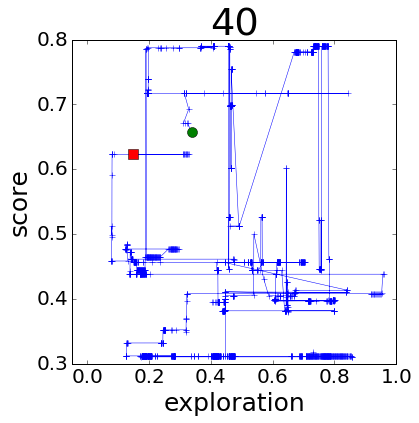

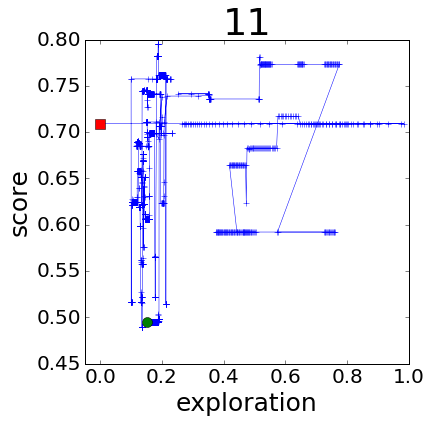

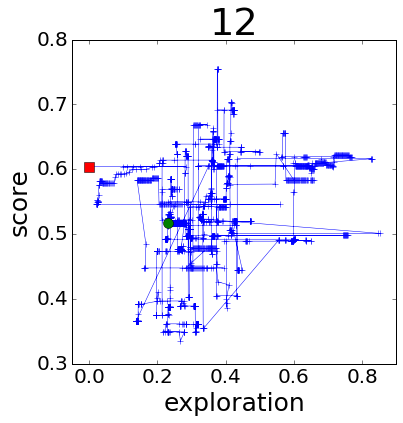

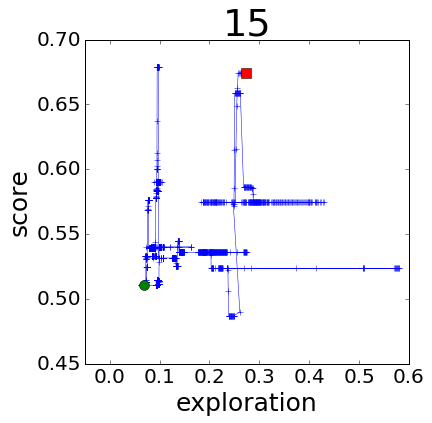

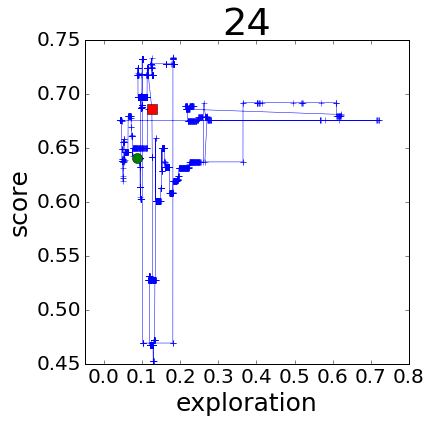

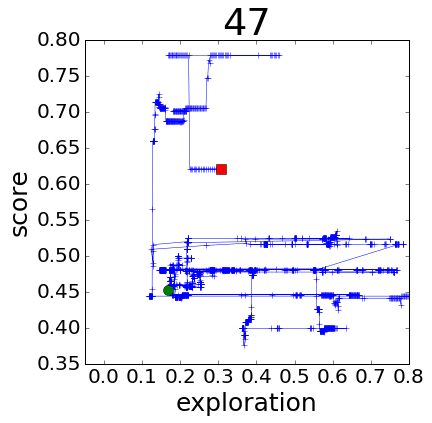

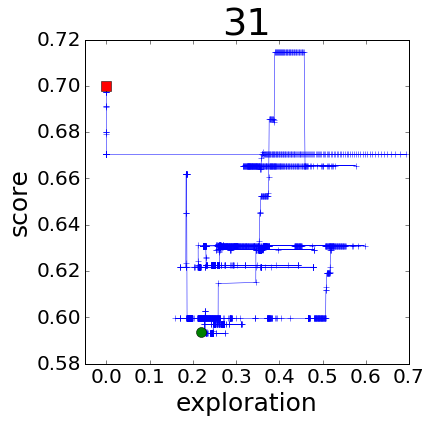

In [33]:
for i in range(48):
    score = dfAllLearning[str(i)].values[:]
    explor = dfExplor[str(i+1)].values[:]
    
    c = (~np.isnan(score))*(~np.isnan(explor))
    
    if i in [11,12,15,24,31,40,47]:
    #if i in np.arange(47,48):
        pl.figure(i)
        pl.title(i)
        pl.plot(explor[c],score[c],'+-',lw=0.5)
        pl.plot(explor[c][0],score[c][0],'rs',ms=10)
        pl.plot(explor[c][-1],score[c][-1],'go',ms=10)
        #break
        
        pl.xlabel("exploration")
        pl.ylabel("score")
        pl.xlim(xmin = -0.05)
        
        pl.savefig(dir + "Figures/score_explor_walk_%s.eps"%i)

In [11]:
simpl  = [float(x) for x in simpl]
x = np.arange(1,len(simpl)+1)
compl  = [float(x) for x in compl]

In [43]:
def prepareXY(filename,log=False):
    stringData = open(dir + "Data/%s.csv"%filename,'rb').read().split(",")
    Y = np.array([float(x) for x in stringData ])
    X = np.arange(1,len(Y)+1)
    
    if log:
        c = Y >0
        Y = np.log10(Y[c])
        X = np.log10(X[c])  
    return X,Y

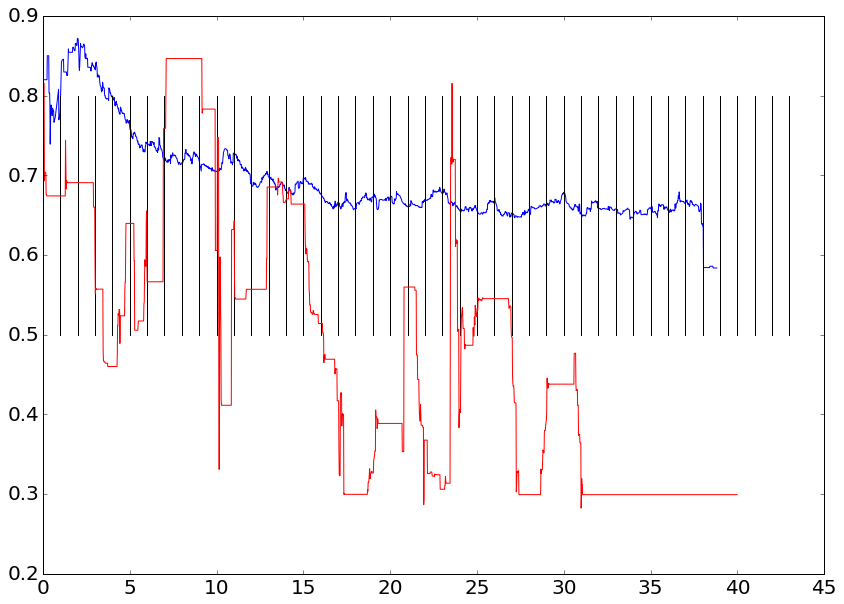

In [50]:
filename = complName
x,y = prepareXY(filename,log=False)
x = x/60.

pl.figure(1,(14,10))
pl.plot(x,y)

yline = np.linspace(0.5,0.8,10)


T = np.arange(0,44,1)
for i in T:
    xline = np.zeros_like(yline) + i
    pl.plot(xline,yline,'k-')
    
#pl.ylim(0.5,0.8)

pl.plot(learn13[:,0]/60.,learn13[:,1],'r-')

LinregressResult(slope=-0.093095490681215573, intercept=-0.1215610783049937, rvalue=-0.92191054796212424, pvalue=0.0, stderr=0.00078810173292323494)
LinregressResult(slope=-0.087805313813836827, intercept=-0.056609869121337364, rvalue=-0.94593012685034195, pvalue=0.0, stderr=0.00063237876503775435)


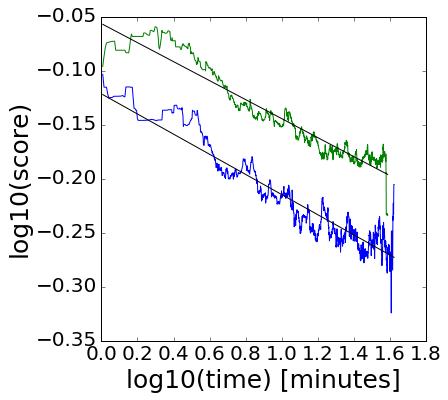

In [41]:
def plotFit(vector):
    '''Vector = {simpl,compl}'''
    y = np.array(map(float,vector))
    x = np.arange(1,len(vector)+1)/60.
    c = (x > 1)*(vector > 0)

    lx = np.log10(x[c])
    ly = np.log10(y[c])
    
    fit = S.linregress(lx,ly)
    print fit
    pl.plot(lx,ly)
    pl.plot(lx,lx*fit[0] + fit[1],'k-')
    
    pl.xlabel("log10(time) [minutes]")
    pl.ylabel("log10(score)")
    
    
plotFit(simpl)
plotFit(compl)

In [519]:
print 10**(-0.19)
print 10**(-0.17)

0.645654229035
0.676082975392


In [20]:
t = 60*24*365*275
print 0.65*t**(-0.10)
t = 60*24*365*900000
print 0.65*t**(-0.07)

#t = 60*24*1.29
#print 0.65*t**(-0.25)

0.0992920669873
0.099008049776


simple
SpearmanrResult(correlation=-0.029629045190838591, pvalue=0.011286220978352881)
LinregressResult(slope=-0.0018534263111505236, intercept=-0.00079888869284555999, rvalue=-0.079185462418874003, pvalue=0.74727455157329659, stderr=0.00565899790088948)
LinregressResult(slope=0.027264161563860134, intercept=0.48916568297158741, rvalue=0.44183703606109059, pvalue=0.058227120348702963, stderr=0.013425923418403604)
blah:  LinregressResult(slope=-0.52564222713220887, intercept=0.72096714272191731, rvalue=-0.98687673505097884, pvalue=8.6295201669461689e-109, stderr=0.0074023030706572663)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 7360 but corresponding boolean dimension is 7312


power law fit : 1.9122717711 0.170871531543 137
complex
SpearmanrResult(correlation=-0.05372558732052251, pvalue=4.9734983554381477e-07)
LinregressResult(slope=-0.0062443026077720282, intercept=-0.0038386335462172474, rvalue=-0.19967925844152851, pvalue=0.42696402721710114, stderr=0.0076604733549574654)
LinregressResult(slope=0.0086213127219359649, intercept=0.56417762800291038, rvalue=0.22746964953096344, pvalue=0.36399976823571922, stderr=0.0092268424571264711)
blah:  LinregressResult(slope=-0.48833320166731142, intercept=0.69643702487352277, rvalue=-0.99127208954167534, pvalue=4.1914582544982789e-110, stderr=0.0058558677934531511)


/Library/Frameworks/Python.framework/Versions/2.7/lib/python2.7/site-packages/ipykernel/__main__.py:60: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 8794 but corresponding boolean dimension is 8746


power law fit : 1.70064677644 0.1788854382 125


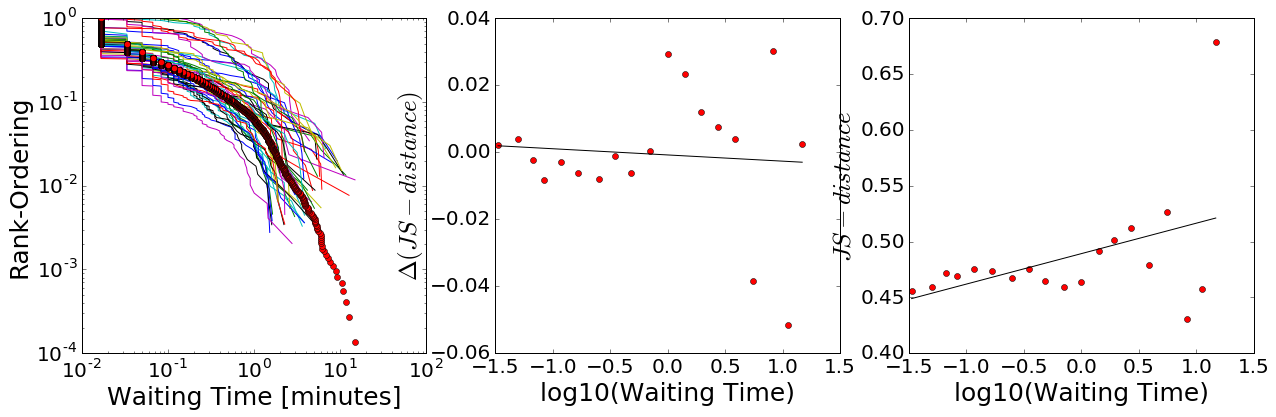

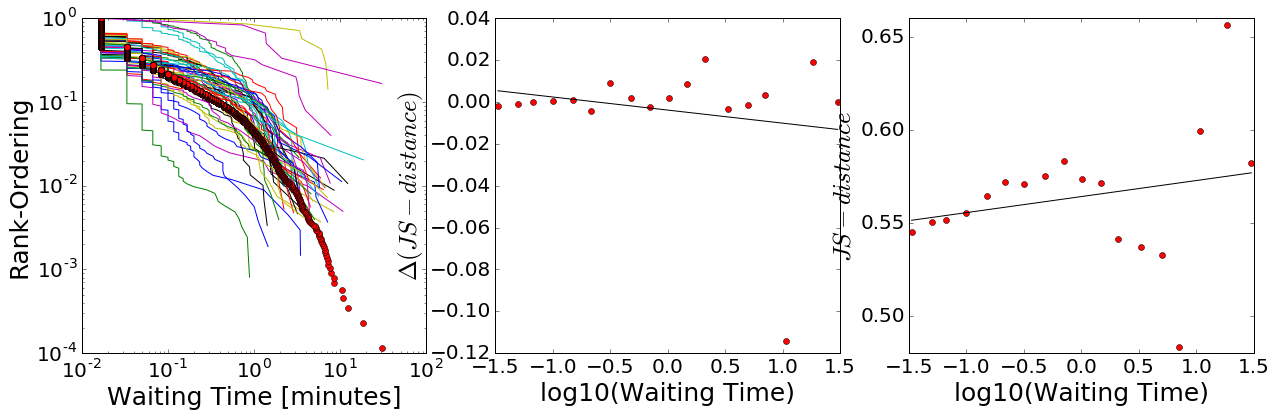

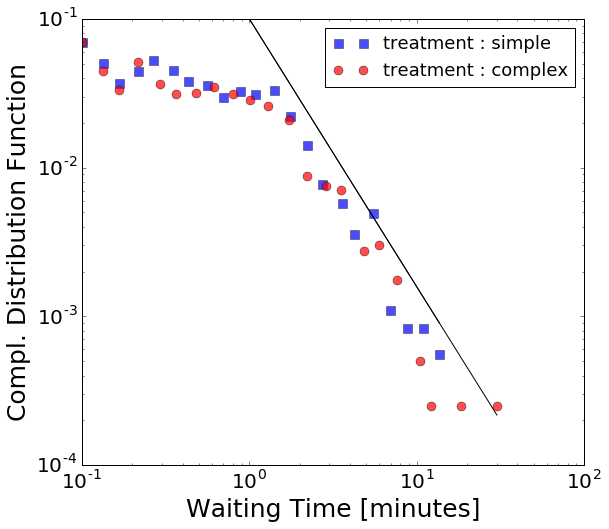

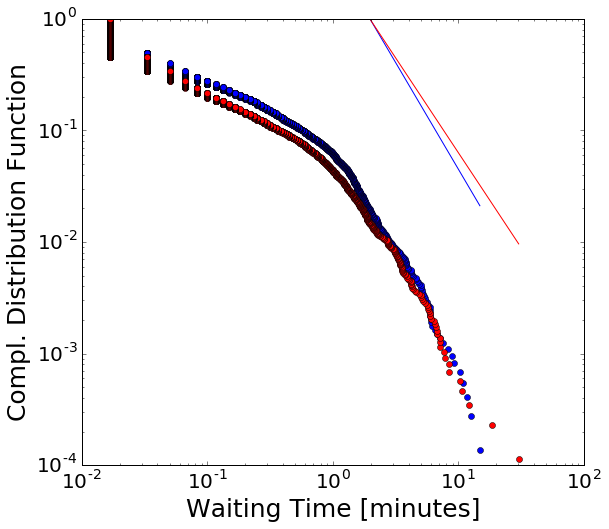

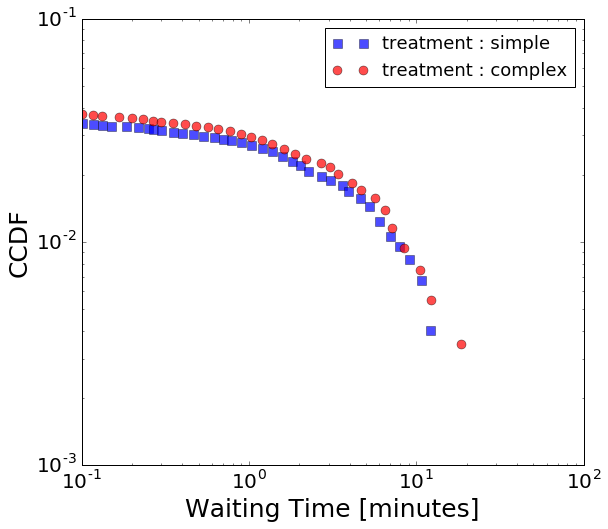

In [218]:
color = ["blue","red"]
symbol = ["s","o"]
for i,datatype in enumerate(['simple','complex']):
#datatype = "complex"

    print datatype
    test_dic = dict(loadDistances(treatment=datatype,remove_duplicates=True))
    WT = []
    JS = []
    dJS = []
    
    pl.figure(i+1,(21,6))
    for key in test_dic.keys():
        test = np.array(test_dic[key])
        index = np.argwhere(test>0)
        wt = np.concatenate([np.diff(index.flatten())])/60.
        js = test[index].flatten()
        djs = np.diff(test[index].flatten())

        pl.subplot(131)
        x,y = rankorder(wt)
        pl.loglog(x,y/float(y[-1]))
        pl.xlabel("Waiting Time [minutes]")
        pl.ylabel("Rank-Ordering")
        pl.ylim(0.0001,1)

        pl.subplot(132)
        #pl.semilogx(wt,djs,'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$\Delta(JS-distance)$")

        pl.subplot(133)
        #pl.semilogx(wt,js[1:],'.')
        pl.xlabel("log10(Waiting Time)")
        pl.ylabel("$JS-distance$")
        
        WT = np.append(WT,wt)
        JS = np.append(JS,js)
        dJS = np.append(dJS,djs)

    
        
    pl.subplot(131)
    x,y = rankorder(WT)
    pl.loglog(x,y/float(y[-1]),'ro')    
    
    pl.subplot(132)
    cond = (WT > 0)*(WT < 100)
    lWT = np.log10(WT[cond])
    B = binning(lWT,dJS[cond],20)
    
    print S.spearmanr(WT,dJS)
    
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.subplot(133)
    B = binning(lWT,JS[cond],20)
    pl.plot(B['bins'],B['mean'],'ro')
    fitB = S.linregress(B['bins'],B['mean'])
    print fitB
    pl.plot(B['bins'],B['bins']*fitB[0] + fitB[1],'k-')
    
    pl.figure(5,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,30)
    
    cond = (lx > 0.3)
    print "blah: " ,S.linregress(lx[cond],ly[cond])
    
    pl.loglog(10**B['bins'],10**np.log10(B['nPoints']/np.sum(B['nPoints'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    pl.loglog(10**B['bins'],10**(B['bins']*-1.8 - 1),'k-')
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    #pl.ylabel("Probability Density Function")
    pl.ylabel("Compl. Distribution Function")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    pl.savefig(dir + "Figures/waiting_times_pdf.eps")
    
    
    pl.figure(6,(9,8))
    print "power law fit :",
    fitdic = plotPowerLawFit(WT,xmin=2.,continuousFit=True,addnoise=False,confint=.01,plot=False)
    pl.loglog(fitdic['x'],fitdic['y'],'o',color=color[i])
    pl.loglog(fitdic['xFit'],fitdic['yFit'],'-',color=color[i])
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("Compl. Distribution Function")
    pl.savefig(dir + "Figures/waiting_times_ccdf.eps")
    #pl.xlim(xmin=3/60.)

    
    pl.figure(7,(9,8))
    x,y = rankorder(WT)
    cond = (x > 0)*(y > 0)
    lx = np.log10(x[cond])
    ly = np.log10(y[cond])
    ly = ly/float(ly[-1])
    B = binning(lx,ly,50)
    pl.loglog(10**B['bins'],10**np.log10(B['mean']/np.sum(B['mean'])),'o',color=color[i],marker=symbol[i],ms=9,alpha=0.7,label="treatment : %s"%datatype)
    #pl.loglog(x,y/float(y[-1]),'o',color=color[i],marker=symbol[i],label="treatment %s"%datatype)
    pl.legend(loc=0)
    pl.xlabel("Waiting Time [minutes]")
    pl.ylabel("CCDF")
    pl.xlim(xmin=0.10)
    pl.ylim(ymax=0.10)
    

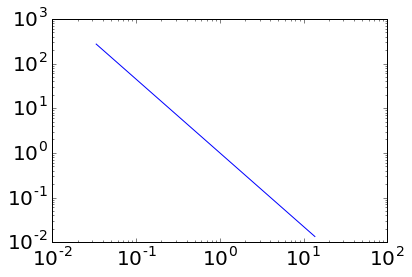

In [207]:
pl.loglog(10**B['bins'],10**(B['bins']*-1.65))